In [1]:
from mne.io import read_raw_eeglab, read_raw
from mne.channels import get_builtin_montages, make_standard_montage
from mne import events_from_annotations, Epochs
import PIL
import mne
raw = None
mne.set_log_level(False)
raw = read_raw_eeglab("../sub400/400MNE.set")
raw = raw.crop(tmin=60, tmax=60+5*60)
raw = raw.copy().resample(512)
raw.set_channel_types({"BIP1":"eog","BIP2":"misc","BIP3":"misc","BIP4":"misc", "AUX1":"misc","AUX2":"misc","AUX3":"misc","AUX4":"misc", "M1":"misc", "M2":"misc"})
raw.set_montage(make_standard_montage("standard_1020"))

/tmp/ipykernel_4363/2342651398.py:8: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab("../sub400/400MNE.set")
/tmp/ipykernel_4363/2342651398.py:11: RuntimeWarning: The unit for channel(s) AUX1, AUX2, AUX3, AUX4, BIP2, BIP3, BIP4, M1, M2 has changed from V to NA.
  raw.set_channel_types({"BIP1":"eog","BIP2":"misc","BIP3":"misc","BIP4":"misc", "AUX1":"misc","AUX2":"misc","AUX3":"misc","AUX4":"misc", "M1":"misc", "M2":"misc"})
/tmp/ipykernel_4363/2342651398.py:12: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['M1', 'M2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(make_standard_montage("standard_1020"))


<RawEEGLAB | 400MNE.fdt, 72 x 153600 (300.0 s), ~84.5 MB, data loaded>

In [2]:
import matplotlib.pyplot as plt
from ipywidgets import Textarea, Text, Label, Button, VBox, HBox, HTML, Image, Tab, Output, Layout, FloatSlider, Dropdown, FloatRangeSlider, Checkbox, RadioButtons, HTMLMath
from IPython.display import display, clear_output
import numpy as np
import markdown

width,height = 600, 400

In [3]:
def get_answer_to_reveal(text, answer, with_input_field=False):
    test_reveal_button = Button(description="Check answer")
    
    test_answer = HTML(answer)
    test_answer.layout.visibility="hidden"
    def show_answer(b):
        test_answer.layout.visibility="visible"
    test_reveal_button.on_click(show_answer)
    layout = Layout(width="50%", border="solid purple")
    if with_input_field:
        elements = VBox([HTML(text), HBox([Text(), test_reveal_button]), test_answer], layout=layout)
    else:
        elements = VBox([HTML(text), HBox([test_reveal_button]), test_answer], layout=layout)
    return elements
    
def get_chapter(panels, panel_titles):
    tab = Tab()
    tab.children = panels
    tab.titles = panel_titles
    chapter = tab
    return chapter

In [4]:

def code_block(code, links=None):
    code_block_html = HTML(f"""
    <pre><code>
    {code}
    </code></pre>""")
    if links is not None:
        sources = [f"""<a href="{link}" target="_blank"><u>{name}</u></a>""" for name, link in links.items()]
        sources = "\n".join(sources)
        sources = "References: " + sources
        sources = HTML(sources)
        
        sources.style.background = "#d3f705"
        ret = VBox([code_block_html, sources])
    else:
        ret = code_block_html
    return ret

In [5]:
def check_data(d):
    ch_names = d.ch_names
    assert type(ch_names) == list and len(ch_names) > 0
    assert raw.n_times > 60
    

In [6]:
def get_image_caption(link, text="Image source"):
    t = f"""<a href="{link}" target="blank_" style="color:#808080">{text}</a> """
    return t

In [7]:
# Function to display the selected figure

def get_figure_selector(figures, headline=None, button_labels=None, ic_label_predictions=None):
    if button_labels is None:
        button_labels = {str(i):i for i in range(len(figures))}
    output = Output()
    buttons = [Button(description=str(i)) for i in button_labels.keys()]
    prediction_label = Output()
    
    def show_figure(fig_index):
        # Clear the previous output
        output.clear_output(wait=True)
        with output:
            display(figures[fig_index])
        if ic_label_predictions:
            with prediction_label:
                clear_output(wait=True)
                display(HTML(ic_label_predictions[fig_index]))
    
    # Define what happens when a button is clicked
    def on_button_click(b):
        fig_index = button_labels[b.description]
        show_figure(fig_index)
    
    # Attach the click event to each button
    for button in buttons:
        button.on_click(on_button_click)
    
    # Display the buttons and the output area
    button_box = HBox(buttons)
    if headline:
        heading = HTML(f"""<h2>{headline}</h2>""")
    else:
        heading = HTML("")
    
    panel = VBox([heading, button_box, prediction_label, output])
    return panel

# Start

In [63]:
#raw = None

text = """
Welcome! 
This tutorial has two purposes
<br>
<b>First</b>, it teaches you to work with EEG data with explanations and visualizations. 
<br>
<b>Second</b>, it allows you to deeper your understanding by applying the newly learned concepts to real data. 
<br>
You will see panels with the heading <b>Try it yourself!</b> where you can visualize and manipulate data in real time. 
Working with data on your own will help you learn more easily than by just reading explanations. Make use of the interactive panels throughout this tutorial!
"""
panel_1 = HTML(text)


code = code_block("""
x = mne.call_function(x)
""")
text = f"""
Within this course, we will use a python-library called MNE-python from time to time. 
MNE-python provides lots of functions you can use to work with EEG data. 
When we use some code from MNE, it will be displayed like this: 
"""
text2 = """
This is not a full tutorial on MNE though. If you want to learn more about MNE, you can browse their tutorials by clicking <a href="https://mne.tools/stable/documentation/index.html" target="_blank"><u>here</u></a>.
If you don't care about coding and using MNE, you can also ignore the code examples. You will still be able to understand what is happening.
"""

panel_3 = VBox([HTML(text), code, HTML(text2)])

text = """
The course is structured as follows:
<ul>
<li> Chapters (1) and (2) explain <b>how</b> an EEG works, how the data recorded with an EEG looks like and introduces the concept of <b>noise</b>.</li>
<li> Chapters (3) to (5) go into more detail an how <b>periodic signals</b> can be described and analyzed in general. These chapter are not EEG-specific. </li>
<li> Chapter (6) introduces the idea, that a complicated signal can be constructed fom a combination of pure sine waves </li>
<li> Chapter (7) describes the EEG signal using the learnings from (3) to (5) and introduces the common <b>eeg bandwidths</b>. </li>
<li> Chapter (8) introduces the <b>power spectrum</b>, which is a more sophisticated way to analyze and understand EEG data.</li>
<li> Chapter (9) explains how to <b>filter</b> eeg data to remove noise.</li>
<li> Chapter (10) explains why eeg data always needs to be compared to a <b>reference</b>.</li>
<li> Chapter (11) explains what <b>events</b> are.</li>
<li> Chapter (12) deepen the understanding of the <b>noise</b> concept and explain common <b>artifacts</b> that can be found in eeg data.</li>
<li> Chapters (13) and (14) explain the <b>Independent Component Analysis (ICA)</b> and educate the reader on identifying <b>artifacts</b> with it.</li> 
<li> Chapter (15) introduces <b>ICLabel</b>, an automatic approach to label IC components with less effort </li>
<li> Chapter (16) describes the <b>removal of artifacts</b> based on the insights of chapters (13) to (15)</li>
<li> Chapter (17) briefly mentions <b>other measures of electric activity</b> that may be used alongside the eeg </li>
<li> Chapter (18) describes <b>ERPs and ERSPs</b> as meaningful signals that reflect brain activity reserach is primarily interested in </li>
<li> Chapter (19) describes the <b>mathematical background of the Fourier Transform</b>, that has already been introduced in chapter (6) in more detail. </li>
</ul>
"""
panel_4 = HTML(text)

chapter = get_chapter([panel_1, panel_3, panel_4], ["1","2","3", "4"])
display(chapter) #../sub400/400MNE.set

# (1) What is an EEG?

In [35]:
text = """
What is an EEG at all? EEG stands for Electroencephalography. "Encephalon" is the greek word for brain and "graphein" means writing. 
Accordingly, an EEG is a device that writes electric brain signals.
You may already know, that the brain sends electric signals along the neurons' axons. 
There are plenty of neurons and they send many tiny signals per second. 
If researchers want to measure these signals, there are different ways to do that, each of which has advantages and disadvantages. 
If you want to measure the signal very precisely on the basis of single neurons, you have to cut open the head and implement tiny measurement tools. 
This is done in animals most often, because human's don't want their heads to be cut open. 
The EEG however, doesn't need any operation beforehand, which is why we call it a <b>non-invasive method</b>. 
You can easily imagine that this makes it much more accessible for research. 
You just need to place an eeg cap on the participants head that looks like this:
"""
im_eeg_hood = Image(value=open("resources/EEG_cap.jpg", "rb").read(),width=200,height=250)
image_caption = get_image_caption("https://en.wikipedia.org/wiki/Electroencephalography#/media/File:EEG_cap.jpg")
panel_1 = VBox([HTML(text), im_eeg_hood, HTML(image_caption)])


text = """
I already mentioned, that the EEG measures electric signals of neurons, and it does that from outside of the skull. 
If a single neurons sends an electric signal, we would never be able to record this from the outside of the skull, though, because it would be way too small. 
However, if many neurons send electric signals at the same time, they sum up and this can be measured from the outside with sensitive electrodes. 
This is what the EEG does. 
It is important to understand, that the EEG doesn't record <i>all</i> the brain activity but just the very strong highlights. 
<br>
Imagine you are standing outside of a soccer arena. 
You don't see the game, you just hear the fans' voices. 
Would you be able to understand everyting that happens within the game?
Most likely not. But you would be able to recognize major events like a scored goal, because here all fan's (or half of them) cheer altogether. 
Transferred to the brain, these are the kinds of signals an EEG measures. 
"""
panel_2 = HTML(text)

text = """
On the picture shown before you may have recognized, that an EEG cap includes multiple electrodes at different locations. 
The brain has a very sophisticated structure and different parts of it are responsible for different functions. 
For example (and strongly simplified), the back part of the prain (the so-called occpital region) is associated with processing visual information, while the frontal part is responsible for deliberate and conscious thought. 
Due to that structure, it makes sense to place electrodes at different locations on the skull to measure these differences. 
<br>
Additionally, multiple electrodes allow to measure a signal more reliably. 
In science it is common to use many measurements and aggregate them to get a more robust picture of what is happening. 
If you were to determine the depth of the ocean you also would perform multiple measurements at different locations, wouldn't you?
"""
panel_3 = HTML(text)

text = """
How many electrodes does an EEG have at all and where exactly are they located? 
There is not <i>the one and only</i> eeg cap, but there are different standards on the number and location of electrodes. 
The format used most often is known as 10-20-system. In the following you see a visualization of the electrodes.
"""
im_10_20 = Image(value=open("resources/10_20.png", "rb").read(),width=400,height=600)
text_2 = f"""
{get_image_caption("https://en.wikipedia.org/wiki/10%E2%80%9320_system_%28EEG%29#/media/File:21_electrodes_of_International_10-20_system_for_EEG.svg")}
<br>
Do you see the nose at the top (Nasion) and the ears to the left and right? The person in the image looks upwards and you look at their head from above. 
You see that the electrodes all have names like NZ, PO3 or P9. 
When you look at the data recorded by the EEG, you want to know which electrode captures which signal, and this is why you want to be familiar with the naming scheme.
The first letter(s) indicate the region of the brain the electrode is placed on: pre-frontal (Fp), frontal (F), temporal (T), parietal (P), occipital (O) and central (C). 
This indicates the position on the axis from nose to back of the head. 
On top of that, there is information on the location of the axis from ear to ear. 
Electrodes with a "Z" are placed in the middle of the brain. 
Electrodes with even numbers are placed on the right part of the head, while electrodes with uneven numbers are on the left part. 
For example, FZ is frontal and in the middle. P4 is parietal and on the right part. C3 is central and on the left part of the brain. 
You also see two electrodes "A1" and "A2" placed behind the ear. Sometimes they are also called "M1" and "M2" instead. 
In some picture there are also two points NZ and IZ. These are <b>not</b> electrodes, but just points of reference, that are used, when the EEG cap is placed on a person's skull. 
While they may appear on such visualizations, you will never find EEG data recorded from electrodes called NZ or IZ. 
"""
panel_4 = VBox([HTML(text), im_10_20, HTML(text_2)])

text = """
The 10-20 system we just saw had 21 electrodes in total. 
However, sometimes you don't need that much, or you need even more. Hence, different standards exist with different numbers of electrodes. 
Often you may see the 10-10 system, which is an extension of the 10-20 system. If you observe it carefully, you will see that it includes all the electrodes of the 10-20 system, extended by some more:
"""
im_10_10 = Image(value=open("resources/10_10.png", "rb").read(),width=400,height=600)

text_2 = f"""
{get_image_caption("https://de.wikipedia.org/wiki/Datei:International_10-20_system_for_EEG-MCN.png")}
<br>
Other EEG caps may use less electrodes like the 14 ones here:
"""
im_14 = Image(value=open("resources/14_channel_eeg.png", "rb").read(),width=400,height=600)

text_3 = f"""
{get_image_caption("https://www.researchgate.net/figure/Location-of-14-electrodes-of-Emotiv-EEG-device_fig1_283441559")}
<br>
When working with EEGs, it is important to decide on the number of electrodes before, depending on the equipment available and the researchs' demands. 
Even more important is to know which system has been used when interpreting the data, though. 
When you analyze EEG signals (as we will do in this tutorial later), you need to know how many electrodes recorded them and where exactly these electrodes have been placed. 
"""
panel_5 = VBox([HTML(text), im_10_10, HTML(text_2), im_14, HTML(text_3)])

montages = get_builtin_montages()
montages = "".join([f"<li>{x}</li>" for x in montages])
channels = np.random.choice(raw.ch_names, size=min(6, len(raw.ch_names)))
code = code_block("""
raw.set_montage(make_standard_montage("standard_1020"))
raw.plot_sensors(ch_type="eeg")
""")
text = f"""
MNE comes with a list of builtin channel systems (also called <b>montages</b>) that are the following:
<br>
<ul>
{montages}
 </ul>
<br>
Let's assume your data is missing the information on which system has been used exactly. However, you still have the channel names and from these, the system may be inferred. 
Here are some channels of your data:
{channels}
Can you already guess, which system has been used?
MNE also provides a function to apply a selected montage to a dataset. 
{code}
Try it with one of the montages listed above!
Can you find the right montage for your data?
What happens, if you use a montage that doesn't fit? 
"""
text_input = Text(placeholder="Montage name")
def try_out_montage(name=None):
    if name is None:
        name = text_input.value
    try:
        x = raw.copy()
        x.set_montage(make_standard_montage(name))
        t = "This was sucesfull! This is where the electrodes are located on the skull:"
        return [HTML(t), x.plot_sensors(ch_type="eeg", show=False)]
    except Exception as e:
        t = "Oh no, there was en error! Do you understand the error message? What was the problem?"
        return (HTML(t),str(e))
output_montage = Output()
def display_montage(b):
    t, montage_or_error = try_out_montage()
    with output_montage:
        clear_output()
        display(t,montage_or_error)
button = Button(description="Apply Montage")
button.on_click(display_montage)

panel_6 = VBox([HTML(text), text_input, button, output_montage])

text = """
The <a href="https://en.wikipedia.org/wiki/Electroencephalography" target="_blank"><u>Wikipedia article on EEG</u></a> can be a good starting point for further reading. 
<br>
Due to different head sizes, EEG caps need to be adjusted to each participant. If you want to learn more about this procedure, you can take a look <a href="https://gvb-gelimed.com/10-20-elektrodensystem-in-der-elektroenzephalografie-eeg/" target="_blank"><u>here</u></a> (german). 
"""
references = HTML(text)

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4, panel_5, panel_6, references], ["1","2","3","4", "5", "Try it yourself!", "References"])
display(chapter)

# (2) EEG Data

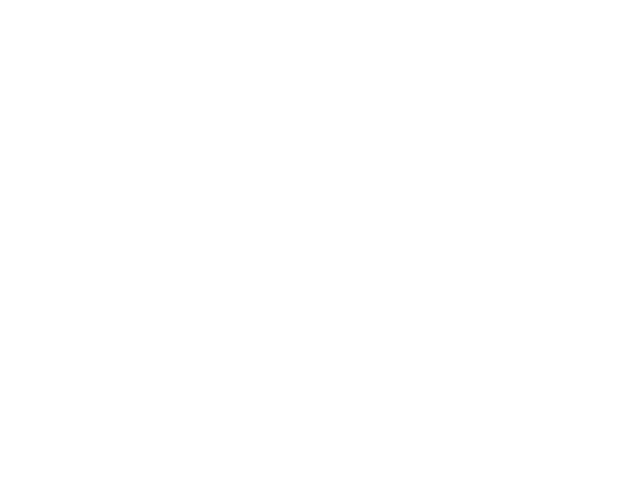

In [10]:
%matplotlib inline
%matplotlib widget



text = """
Now that we know what an EEG measures, it is time to take a look at the data it collects. 
Most of the time, you will see the data being displayed like this: 
"""

im_eeg = Image(value=open("resources/eeg_raw_signal.png", "rb").read(),width=400,height=600)

text_2 = """
First of all, you see multiple lines of data here. 
These are called <b>channels</b> and corespond to the different electrodes you are already familiar with. 
You see the electrode/channel names on the left.
You also see, that the data is ploted over time on the x-axis. 
With an eeg, you don't just record brain activity at a given point in time, but you record it over a longer timerange. 
The y-axis displays the power of the electric activity measured in volt.
However, as the brain uses rather low voltages (compared to the electric current coming out of your power socket), eeg data will typically be displayed in μV (micro-volt, i.e. 10⁻⁶ volt).
"""

panel_1 = VBox([HTML(text), im_eeg, HTML(text_2)])


text = """
One thing to be aware of when working with EEG data is the fact, that this data is very noisy. What exactly does that mean? 
Take a look at the picture below. It is quite hard to recognize anything in it, right? 
That is because many pixels with random colors have been added to the original image. That is noise. 
However, observe what happens when you reduce the noise by dragging the slider to the left. Can you recognize the image now and tell, what it shows?

"""
def add_gaussian_noise(image_array, mean=0, std=250):
    # Generate Gaussian noise
    gauss = np.random.normal(mean, std, image_array.shape)
    noisy_image = image_array + gauss
    
    # Clip values to stay in valid range (0, 255)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    
    return noisy_image
    
output_noisy_image = Output()
image_otter = PIL.Image.open('resources/otter.jpg').convert('RGB')
image_array = np.array(image_otter)
noise_slider = FloatSlider(min=0, max=500, value=500, readout=False, continous_update=False)
def on_value_change(change):
    noisy_image_array = add_gaussian_noise(image_array, std=noise_slider.value)
    noisy_image = PIL.Image.fromarray(noisy_image_array)
    with output_noisy_image:
        clear_output(wait=True)
        display(noisy_image)
        
on_value_change(None)      
noise_slider.observe(on_value_change, names="value")
panel_2 = VBox([HTML(text),noise_slider, output_noisy_image])

text = """
In the previous tab you saw, that noise can make it hard to recognize an image. 
However, noise can also be applied to different kinds of data. For example, noise in a sound recording can make it hard to hear what a person is saying.
Likewise, eeg data, which is electric voltage over time can become noisy, as you see in the following. 
The first plot is a pure signal, the second plot is the same signal but with some noise added on top. 
"""



text_2= """Do you see the first curve hidden in the second?
<br>
In general, we say that <b>noise</b> superimposes a <b>signal</b>.
The signal is always the data you <b>want</b> to measure, while the noise is everything else that distorts it. 
In the previous tab, the image of the otter was the signal and in the above figure, the first curve is the signal.
In an EEG, brain activity is the signal we are interested in and everything else we measure, that is not coming from the brain, is noise. 
For example, muscle movements also procude electric activity that may be recorded by the EEG. 
<br>
However, you don't need to be completely noise-free all the time. With a little noise you still had been able to recognize the image, right? 
If the data is too noisy, we may not be able to detect the actual signal, but we can afford having some noise. If the signal is strong enough, it will still be visible through the noise.
In a later chapter, we will see how certain kinds of noise can be filtered from the data to make the signal shine through. 
"""

im_noisy_signal = Image(value=open("resources/noisy_signal.png", "rb").read(),width=width,height=height)


panel_3 = VBox([HTML(text), im_noisy_signal, HTML(text_2)])

text = """This is how some real eeg data looks like.
Note that you can interact with this visualization. You can click on the bars on the x and y axis to jump to different points in time or different channels.
Do the signals differ between the channels? Are there channels that stand out in particular?
Can you use your knowledge about the electrodes' locations to explain some of these differences?"""


output_raw_eeg = Output()
plt.clf()
with output_raw_eeg:
    raw.plot(n_channels=4)

panel_4 = VBox([HTML(text), output_raw_eeg])

text = """
You can read eeg data as follows in MNE: 
"""

code = code_block("""
    from mne.io import read_raw_eeglab, read_raw
    raw = read_raw("path/to/your/dataset")
""", 
                 links = {"read_raw":"https://mne.tools/dev/generated/mne.io.read_raw.html"})

text2 = """
For displaying the data, you can use the plot function:
"""
code2 = code_block("""raw.plot(n_channels=4)""", links={"plot":"https://mne.tools/dev/generated/mne.io.Raw.html#mne.io.Raw.plot"})

text3 = """
A more detailed overview on how to read data from different EEG devies in MNE can be found <a href="https://mne.tools/dev/auto_tutorials/io/20_reading_eeg_data.html#sphx-glr-auto-tutorials-io-20-reading-eeg-data-py" target="_blank"><u>here</u></a>.
"""

code_panel = VBox([HTML(text), code, HTML(text2), code2, HTML(text3)])


chapter = get_chapter([panel_1, panel_2, panel_3, panel_4, code_panel], ["1","2","3", "Try it yourself!", "Code"])
display(chapter)


# (3) What is a periodic signal?

In [69]:
%matplotlib inline

im_string_moving = Image(value=open("resources/string_moving.gif", "rb").read(),width=width,height=height)

text = """
We have taken a first look at EEG data in the previous chapter. 
Now we want to understand its structure in more detail. 
To this end, we first need to take a step back and talk about what <b>periodic signals</b> are in general. 
In many applications you have processes that are repeating. 
For example, if you pull the string of a guitar and let it go, this string will move back and forth in a periodic manner.
You see a visualization of this process in the following. 
The string starts at the top (a), then it moves back to the middle (e) and continues moving in the opposite direction (i). 
Then it moves back to the middle again (m) and back to the position it started from (p and ultimatively a). From here it moves to the middle again and so on. 
"""

text_2 = f"""
{get_image_caption("https://www.phys.unsw.edu.au/jw/strings.html")}
<br>
Now imagine you are able to measure the position of middle point of the string at different points in time during this process. 
Let's say the maximum displacement of the spring towards the top (as in (a)) is indicated by a value of 1 and the middle position of the string (e) is a 0. 
The maximum displacement in the opposite direction (as in (i) is a -1.
If we plot the time on the x-axis and the displacement on the y-axis, we would get data points like these: 
"""

x = [(1/2)*np.pi, (3/4)*np.pi, np.pi, (5/4)*np.pi, (3/2)*np.pi, (7/4)*np.pi, 2*np.pi]
y = np.sin(x)
fig,ax = plt.subplots()
ax.set_xticks(x, labels=["a", "c", "e", "g", "i", "k", "m"])
ax.scatter(x,y, color="black")
fig.set_size_inches(4,2)
output_sampling_points = Output()
with output_sampling_points:
    display(fig)

text_3 = """
If we do this more frequently and with smaller timesteps in between, the curve looks more smooth:
"""

output_smooth_sampling = Output()
x = np.arange((1/2)*np.pi, 2*np.pi, 0.1)
y = np.sin(x)
fig,ax = plt.subplots()
ax.scatter(x,y, color="black")
ax.set_xticks([])
fig.set_size_inches(4,2)
with output_smooth_sampling:
    display(fig)

panel_1 = VBox([HTML(text), im_string_moving, HTML(text_2), output_sampling_points, HTML(text_3), output_smooth_sampling])

text = """
Now we saw a moving string turn into a <b>periodic signal</b>. 
This was possible, because it's movement was periodic, i.e. recurring over time. 
Likewise, brain activity can be periodic. Say you measure the activity over time and see that it goes up and down again and again. 
Can you imagine that such a signal would look like this?
"""
output_ideal_signal = Output()
x = np.arange((1/2)*np.pi, 12*np.pi, 0.1)
y = np.sin(x)
fig,ax = plt.subplots()
ax.plot(x,y, color="black")
fig.set_size_inches(4,2)
with output_ideal_signal:
    display(fig)
text2 = """
Mathematically, such signals are <b>sine waves</b>. The sine is just a mathematical function that yields exactly the curve visualized above. 
<br>
You may wonder, why we need to describe brain activity as a periodic signal. 
In the next chapters you will understand, that this representation of the data allows us to describe and manipulate the data more easily. 
"""
panel_2 = VBox([HTML(text), output_ideal_signal, HTML(text2)])

chapter = get_chapter([panel_1, panel_2], ["1", "2"])
display(chapter)


# (4) Signal Properties

In [70]:

im_1_5 = Image(value=open("resources/amp_1_freq_5.png", "rb").read(),width=width,height=height)
im_1_25 = Image(value=open("resources/amp_1_freq_25.png", "rb").read(),width=width,height=height)
im_7_5 = Image(value=open("resources/amp_7_freq_5.png", "rb").read(),width=width,height=height)
im_7_25 = Image(value=open("resources/amp_7_freq_25.png", "rb").read(),width=width,height=height)




text1 = """
In the previous chapter we understood what a periodic signal is and why brain activity can be interpreted as such. 
We now want to discuss some properties that describe signals that are the <b>frequency</b> and the <b>amplitude</b>.
<br>
The <b>frequency</b> indicates, how often a signal oscillates, i.e., how often it goes up and down in a given time-range. 
We measure the frequency in Hertz (Hz), which can be understood as the number of ups and downs per second. 
A frequency of 50Hz means 50 ups and downs in one second. 
You can use the frequency to describe different processes that repeat over time. 
For example, you heart beats ~60 times a minute, which is a frequency of 0.016Hz. 
If you play the A-key on a piano, the string and the air it puts into motion will oscilate with a frequency of 440Hz. 
If you play a higher note, the frequency increases and with lower notes, the frequency decreases. 
Electromagentic waves have frequencys as well. Red light has a frequency of 400THz (terra herz, that is 10¹² herz) and X-rays have a frequency around 10¹⁸ Hz. 
"""

panel_1 = HTML(text1)

text = """
As mentioned, the frequency in Hz is the number of oscilations per second. In the following you see two signals. 
"""
answer_text = """
The left signal has a frequency of 5 Hz. You can find out by counting how often the signal does a full oscilation from 0 (where it starts), up to 1, down to -1 and back to 0.
You could also count the number of mountains (+1) or valleys (-1) in 1 second. 
The right signal has a higher frequency of 25 Hz. 
"""
answer = get_answer_to_reveal("Can you tell, which frequencies they have?", answer_text)
panel_2 = VBox([HTML(text), HBox([im_1_5, im_1_25]), answer])

text = """
The <b>amplitude</b> tells you, how much a signal goes up and down in one cycle. 
In the following you see two plots of same frequency but with different amplitudes. Do you see, that the one covers a range from -1 to +1 on the y-axis, but the other covers a bigger range from -7 to +7?
The first signal has an amplitude of 1, the second has an amplitude of 7. 
"""
text_2 = """
The amplitude of a signal is related to its energy or power (which will be explained later in more detail). 
If you play a sound on an instrument, higher amplitude means a louder sound. 
If you make yourself aware that a very loud noise can even physically harm your ear, you understand, that this is related to higher energy. 
"""
panel_3 = VBox([HTML(text), HBox([im_1_5,im_7_5]), HTML(text_2)])

text = """
Here you can create your own signals. 
You can control the frequency and the amplitude with the sliders and see how this affects the curve. 
"""
x = np.arange(0, 1, 0.001)
frequency_slider = FloatSlider(min=0, max=30, value=5, description="Frequency")
amplitude_slider = FloatSlider(min=0, max=10, value=2, description="Amplitude")
signal_plot = Output()
def show_signal(b):
    frequency = frequency_slider.value
    amplitude = amplitude_slider.value
    y = amplitude*np.sin(frequency*x*2*np.pi)
    with signal_plot:
        clear_output(wait=True)
        fig,axs = plt.subplots()
        axs.plot(x,y)
        axs.set_ylim(-10,10)
        axs.set_xlim(0,1)
        display(fig)
create_plot_button = Button(description="Create Signal")
create_plot_button.on_click(show_signal)
panel_4 = VBox([HTML(text), HBox([frequency_slider, amplitude_slider, create_plot_button]), signal_plot])

im_4_15 = Image(value=open("resources/amp_4_freq_15.png", "rb").read(),width=width,height=height)
answer = get_answer_to_reveal("What is the frequency and the amplitude of this signal?", "Amplitude: 4 (because the signal goes from -4 to 4 on the y-axis). Frequency: 15 (because there are 15 ups and downs within one second).")
panel_5 = VBox([im_4_15, answer])

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4, panel_5], ["1","2", "3", "Try it yourself!", "Test yourself!"])
display(chapter)

# (5) Sampling Frequency

In [71]:
%matplotlib inline

file = open("resources/10_hz_signal.png", "rb")

text = """
We just learned, that an EEG measure brain activity as an electric signal and we saw, that such signals have a frequency and an amplitude. 
We now want to explain the process of sampling this data. 
Brain activity is continous, that means, it happens all the time. 
However, the EEG can't measure the activity <i>all the time</i> but does a measurement every few timesteps. 
For comparison, think of making a video with your camera. The camera also doesn't record <i>every</i> movement that happens, but does ~30 fotographs per second. 
This is enough to capture a typical scenery and display a fluid movement. 
However, there can be scenarios where 30 fotographs per second is not sufficient. 
If you want to record an explosion in detail, you may need a slow-motion camera that takes more images per second. 
<br>
With this idea in mind, let us see how in the eeg the <b>sampling frequency</b>, which is the analogon to the camera's images per second, can influence the data we record.
"""
panel_0 = HTML(text)

text1 = "Say we have a signal that looks like this."
im_signal = Image(value=open("resources/10_hz_signal.png", "rb").read(),width=width,height=height)
panel_1 = VBox([HTML(text1), im_signal])

text2 = "We now sample this signal, i.e., we measure it's vaue at different points in time. These points in time we see as orange dots here. All the points have equal distance on the x-axis. If we do that often enough, we can connect the dots and get the signal."
im_signal_sampled = Image(value=open("resources/10_hz_signal_sampled.png", "rb").read(),width=width,height=height)
panel_2 = VBox([HTML(text2), im_signal_sampled])

text3 = "However, what would happen, if we use very few points only? Take a look at the following example. Again, these points all have the same distance on the x-axis. However, they don't allow to capture the full range of the signal. If we connect them, we get a signal (flat orange line) that is very different from the one, we wanted to sample."
im_signal_sampled_incorrectly_1 = Image(value=open("resources/10_hz_signal_sampled_incorrectly_1.png", "rb").read(),width=width,height=height)
panel_3 = VBox([HTML(text3), im_signal_sampled_incorrectly_1])

text4 = "It would be very bad luck, if all our points catch the exact same value of the signal, as in the previous example. However, if the number of points is too small, we can end up with arbitrary signals, that just don't reflect the signal we are sampling from"
im_signal_sampled_incorrectly_2 = Image(value=open("resources/10_hz_signal_sampled_incorrectly_2.png", "rb").read(),width=width,height=height)
panel_4 = VBox([HTML(text4), im_signal_sampled_incorrectly_2])

text = """
In a similar way, the shift between the signal and the sampling points can have an influence on the signal reconstructed from the sampling. 
For example, you could sample your data at timepoints [0.1,0.2,0.3,0.4,0.5] or at [0.15, 0.25, 0.35, 0.45, 0.55]. 
Note that in both cases, the distance between the sampling points (i.e., the sampling frequency) is the same, but the second row of sampling points is shifted towards the first. 
Such a shift can lead to a different signal, as visualied in the following. In both plots, the same sampling frequency is used, but the second one is shifted a little in time.
"""

im_shift_0 = Image(value=open("resources/nyquist_shift_0.png", "rb").read(),width=width,height=height)
im_shift_1 = Image(value=open("resources/nyquist_shift_1.png", "rb").read(),width=width,height=height)
panel_5 = VBox([HTML(text), HBox([im_shift_0, im_shift_1])])

text_explanation = """We just saw, that having too few sampling points can be problematic. 
The number of sampling points in a given time-range is called the sampling frequency. 
E.g., if we collect 10 points per second, this is a sampling frequency of 10Hz.
If we have a signal of n Hz, the sampling frequency must be at least 2*n Hz to capture the signal. 
This is called the <b>Nyquist Frequency</b>. 
The other way round, if you sample with a frequency of n Hz, you can not expect to capture signals that have a frequency of more than n/2 Hz.
<br>
In practice, you might want to relax the threshold of the nyquist frequency a little. 
As you have seen, there are additional influences on the sampling (such as the shift we talked about). 
To account for these you want to have higher sampling rate than indicated by the Nyquist frequency. 
Say you expect a signal of 40Hz. While in theory 80Hz as sampling frequency should be enough, you may want to use a sampling frequency of 100Hz to be more robust against other influences. 
In general, 2.5*n (instead of 2*n) is a reasonable rule of thumb. 
<br>
As a consequence, you need to be aware of the Sampling Frequency when you analyze your EEG data. 
If you sampled it with 60 Hz, you can not expect any frequencies higher than 30Hz. 
In the next chapter, we will see which frequencies are typically expected in brain activity. 
If you want to record those, you need to make sure that your sampling frequency is high enough to allow that. 


"""
panel_6 = HTML(text_explanation)

shift = FloatSlider(min=0, max=0.1, value=0, step=0.002, description="Shift")
output_sampling_plot = Output()
def sample(sampling_freq=50):
    x = np.arange(0, 1, 0.001)
    # create a 20hz signal
    y = np.sin(20*x*2*np.pi)
    x_sample = np.arange(0,1, 1/sampling_freq) + shift.value
    # sample the 20hz signal with the given sampling_freq
    sample = np.sin(20*x_sample*2*np.pi)
    
    fig,axs = plt.subplots(1,2,sharex=True, sharey=True)
    axs[0].plot(x,y, color="black")
    axs[0].scatter(x_sample, sample, color="orange")
    axs[1].plot(x_sample, sample, color="orange")
    fig.set_size_inches(14,6)
    return fig

def show_sampling_plot(b,sampling_freq=None):
    if sampling_freq is None:
        sampling_freq = int(input_freq.value)
    fig = sample(sampling_freq)
    
    with output_sampling_plot:
        clear_output()
        display(fig)

show_sampling_plot(None, sampling_freq=50)
text = """You can try it yourself! The signal you see here has a frequency of 20Hz. What happens if you sample it with lower or higher frequencies?
You can also shift the sampling points with the slider. How does that affect the reconstructed signal? Does the signal become more robust against shifting, when you use a higher sampling frequency?
"""
input_freq = Text(placeholder="50")
button = Button(description="Sample")
button.on_click(show_sampling_plot)
panel_7 = VBox([HTML(text), HBox([input_freq, shift, button]), output_sampling_plot])


answer = get_answer_to_reveal("You are sampling a signal with a frequency of 80Hz. What is the maximum frequency you can expect in the signal you construct from the sampling points?", "40 Hz in theory. In practice, you might want to be more conservative and expect not more than 32Hz.")
panel_8 = HBox([answer])


text = """
MNE allows to change the sampling frequency of a given dataset. This can be used to lower the sampling frequency in the data, but be aware that you can not set it higher than the frequency the data was sampled with in reality.
"""
code = code_block("""
    raw_resampled = raw.resample(<sampling_frequency>)
    """, links={"resample":"https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.resample"})

code_panel = VBox([HTML(text), code])

chapter = get_chapter([panel_0, panel_1, panel_2, panel_3, panel_4, panel_5, panel_6, panel_7,panel_8, code_panel], ["0","1","2","3","4","5",  "Explanation", "Try it yourself", "Test yourself!", "Code"])

display(chapter)

# (6) Fourier Transformation

In [73]:
%matplotlib inline
#https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

text = """
In the previous chapters we have mainly seen pure waves of a given frequency and amplitude. 
However, as you already know, eeg data is never that smooth but the signals here look quite distorted. 
<br>
To understand the signals captured by an eeg in more detail, we will now see how the combination of different pure sine waves can construct a more complicated signal. 
"""

panel_1 = HTML(text)

output_constructed_signal_example = Output()
text = """
We will now construct a signal that is the combination of different sine waves.
For example, a signal could be contructed as 3 * sin(x) + 0 * sin(2*x) + 6 * sin(3*x) + 1 * sin(4*x). 
Note that we combine different frequencies here (1Hz, 2Hz, 3Hz and 4Hz as indicated by the factor inside the sin function) and that there are different strengths of these frequencies (from 0 to 6).
This signal looks as follows:
"""

x = np.arange(0,3, 0.01)
x_pi = x*2*np.pi

w1,w2,w3,w4 = 3,0, 6, 2
y = w1 * np.sin(x_pi) + w2*np.sin(2*x_pi) + w3 * np.sin(3*x_pi) + w4 * np.sin(4*x_pi)
with output_constructed_signal_example:
    fig,axs = plt.subplots()
    axs.plot(x,y)
    display(fig)

text2 = """
This signal looks more complicated than any of the pure sine waves and it is not trivial to tell which frequencies it was contructed with.
"""


panel_2 = VBox([HTML(text), output_constructed_signal_example, HTML(text2)])


constructed_signal_output = Output()
output_fourier_solution = Output()

def show_constructed_signal(b):
    x = np.arange(0,3, 0.01)
    x_pi = x*2*np.pi

    y = slider_w1.value * np.sin(x_pi) + slider_w2.value*np.sin(2*x_pi) + slider_w3.value * np.sin(3*x_pi) + slider_w4.value * np.sin(4*x_pi)
    with constructed_signal_output:
        fig,axs = plt.subplots()
        axs.plot(x,y)
        axs.set_ylim(-40, 40)
        clear_output(wait=True)
        display(fig)
    fourier = np.fft.fft(y)
    N  = len(y)
    n = np.arange(N)
    T = N / (1/0.01)
    freq = n / T
    with output_fourier_solution:
        clear_output(wait=True)
        fig, axs = plt.subplots()
        axs.stem(freq, abs(fourier), "b", markerfmt="", basefmt="-b")
        axs.set_xlim(0, 10)
        axs.set_xlabel("Frequency")
        axs.set_ylabel("Power")
        axs.set_yticks([])
        display(fig)

slider_w1 = FloatSlider(min=0, max=10, value=1, description="1Hz freq")
slider_w2 = FloatSlider(min=0, max=10, value=1, description="2Hz freq")
slider_w3 = FloatSlider(min=0, max=10, value=1, description="3Hz freq")
slider_w4 = FloatSlider(min=0, max=10, value=1, description="4Hz freq")

b = Button(description="Construct waveform")
b.on_click(show_constructed_signal)

text = """
Here you can construct signals on your own by combining frequency waves of 1Hz, 2Hz, 3Hz and 4Hz. You can influence the strength of each signals with the sliders.
What happens, if you add more or less different frequencies? What happens, if one frequency has much higher weight than the others?
"""

panel_3 = VBox([HTML(text), HBox([slider_w1, slider_w2]), HBox([slider_w3, slider_w4]), b, constructed_signal_output])

text = """
So far we have constructed a signal by combining pure sine waves. 
However, when working with eeg data, we are dealing with a scenario of the opposite direction: 
We have a very complicated signal measured with our eeg sensors and we want to deconstruct it. 
That is, we want to know which frequencies the signal consists of. 
<br>
Why is that interesting for us? <b>First</b>, deconstructing the signal allows us to describe it. 
Instead of saying <i>we have a very complicated signal here</i> we can say <i>the signal is mainly driven by a 10Hz frequency</i>.
<b>Second</b>, if we deconstruct the signal, we can manipulate it. For example, we can remove the influences of certain frequencies, if we think they are noise. 
We will discuss this idea of filtering in a later chapter in detail. 
<br>
The problem of deconstructing a signal can be solved with a algorithm called <b>Fourier Transformation</b>.
If we apply the Fourier transformation to the signal we constructed earlier, it gives us data that can be visualized as follows:
"""
output_fourier_solution_example = Output()
fourier = np.fft.fft(y)
N  = len(y)
n = np.arange(N)
T = N / (1/0.01)
freq = n / T
with output_fourier_solution_example:
    fig, axs = plt.subplots()
    axs.stem(freq, abs(fourier), "b", markerfmt="", basefmt="-b")
    axs.set_xlim(0, 10)
    axs.set_xlabel("Frequency")
    axs.set_ylabel("Power")
    axs.set_yticks([])
    display(fig)
text2 = """
Do you see that there are three peaks at the positions x=1, x=3 and x=4?
That is because our signal has been constructed by the frequency 1Hz, 3Hz and 4Hz. 
Also note that the peak at x=3 is highest and x=4 is the smallest. 
This indicates, that the 3Hz sine wave contributes highest power to the signal and the 4Hz sine wave contributes the least. 
<br>We see, the Fourier Analysis allows us to identify the frequencies and weights the signal was constructed with.
<br>
For now, we can just accept the Fourier Transformation as a method we can use out-of-the-box that gives us the result we are interested in. 
We will explain the mathematical background of this method in more detail in a later chapter. 
"""
panel_4 = VBox([HTML(text), output_fourier_solution_example, HTML(text2)])

text = """
Here you can try out the Fourier Transformation by yourself. You can construct a signal (as you previously did) and the Fourier Transformation will revert the process and tell you which frequencies are included in the signal.
How does the Fourier Transformation change, as you construct different signals?
"""

panel_5 =  VBox([HTML(text), HBox([VBox([HBox([slider_w1, slider_w2]), HBox([slider_w3, slider_w4]), b, constructed_signal_output]), output_fourier_solution])])

answer = get_answer_to_reveal(""" What is the purpose of the Fourier Transform? Why would you use it and what do you expect from it?""", 
                             """ The Fourier Transform tells you, which frequencies are contained in a complex signal. When you apply it, it tells you, that your signal consists of the frequencies of, say, 8, 14 and 21 Hz.""")


code = code_block("""import numpy as np 
    fourier = np.fft.fft(y)""", {"np.fft":"https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft"})
text = """
In python, a fourier transformation can be applied with the numpy package. See chapter 18 for more information though. 
"""
code_references = VBox([HTML(text), code])

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4, panel_5, answer, code_references], ["1", "2", "Try it yourself!", "4", "Try it yourself!", "Test yourself!", "Code"])
display(chapter)


# (7) EEG bandwidths

In [74]:
text = """In the following, we will learn what are typical frequencies for EEG data. 
We will see that there are different bandwidths, that are associated with different kinds of brain activity."""
panel_1 = HTML(text)

text = """
What range of frequencies do EEG waves occur in? We already saw, that signals in general can vary from very fast (X-rays in petaherz range) to very slow (your pulse with ~1 Hz). 
The brain does not cover this whole spectrum. One can say, that brain activity is limited to the range of roughly 0.5 to 100Hz.
As a convention, EEG signals are sub-divided into five different bandwiths Alhpa, Beta, Gamma, Delta and Theta, which include different frequencies. The main reason for this sub-division is, that these bandwidths are associated with different kinds of activity:
<p><b>Delta</b> (less than 4Hz) <br> Delta waves have the lowest frequency and occur during sleep.</p>
<p><b>Theta</b> (4-8 Hz) <br> Theta waves appear somewhere in the border between sleep and an awake state. If you daydreaming or doing medidation, theta waves may increase.</p>
<p><b>Alpha</b> (8-12Hz) <br> Alpha waves reflect a state of alertnes and being prepared to act. However, they are associated with a rather relaxed state and not so much with concentrating deliberately.</p>
<p><b>Beta</b> (13-30Hz) <br> When you are awake and have your eyes open, Beta waves occur. They are associated with conscious activities such as listening or thinking concrentratedly.</p>
<p><b>Gamma</b> (greater than 30 Hz) <br> The fast Gamma waves appear, when you need to process multiple sources of information in parallel.</p>



"""
panel_2 = HTML(text)

text = "This is how the bandwidths look like in an EEG signal. Do you agree, that Gamma waves have the highest, and Delta waves have the lowest frequency? Do you think you can specify the correct bandwidth for a given signal? If so, go to the next tab!"
image_source = """<a href="https://www.researchgate.net/publication/275830679_A_New_EEG_Acquisition_Protocol_for_Biometric_Identification_Using_Eye_Blinking_Signals?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6Il9kaXJlY3QiLCJwYWdlIjoiX2RpcmVjdCJ9fQ" target="_blank">Image source</a>"""
im_frequency_bands = Image(value=open("resources/frequency_bands_eeg.png", "rb").read(),width=width,height=height)
panel_3 = VBox([HTML(text), im_frequency_bands, HTML(image_source)])

im_bandwidth_test = Image(value=open("resources/eeg_bandwidth_test.png", "rb").read(),width=width,height=height)
text = f"""{get_image_caption("https://raphaelvallat.com/bandpower.html")}"""
answer = get_answer_to_reveal("""
What bandwidths to these eeg signals belong to?
""",
                             """
                             Alpha (upper one) and Theta (lower one).
                             """)
panel_4 = VBox([im_bandwidth_test,HTML(text), answer])

text = """
You can learn more about bandwidths <a href="https://nhahealth.com/brainwaves-the-language/" target="_blank"><u>here</u></a>.
"""
references = HTML(text)

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4, references], ["1","2", "3", "Test yourself!", "References"])
display(chapter)

# (8) Power Spectrum

In [77]:
%matplotlib inline

#https://neuroimage.usc.edu/forums/t/eeg-power-spectral-density/3634

text = """In this chapter, we will introduce the Power Spectrum, which is a usefull way to display properties of an EEG signal. 
For the power spectrum, we have the frequency on the x-axis and the Power on the y-axis. The power is derived from the squared amplitude of the signal. What does that mean? 
You can understand the amplitude as a measure of the energy. The higher the amplitude, the more energy a signal has. You can easily recognize this, when you hear music. A higher amplitude means a louder sound and that is more energy. 
You don't need to care why exactly we have to square the amplitude (this is just physics), but be aware that squaring a high amplitude also leads to high power.
Summing up, the power is a measure of "how much energy" is in a signal. When we plot this power over the frequency, we get an idea, which different components an EEG signal consists of.
<br>
Let's take a look at such a power spectrum.
"""

im_power_spectrum = Image(value=open("resources/power_spectrum.png", "rb").read(),width=width,height=height)
text_2 = f"""
{get_image_caption("https://neuroimage.usc.edu/forums/t/eeg-power-spectral-density/3634")}
<br>
Do you see, that there is quite a high power around 10Hz? Looks like the 10Hz waves are contributing more to the overall signal than the 20Hz waves, for example.
If you watched the figure carefully, you may have noticed, that the y-axis is not micro-volt squared, but micro-volt squared divided by Hz. This is done to obtain better comparibilty between the different bandwidths. 
Naturally, waves with higher frequencies contain more energy, which would make it unfair to compare a wave of, say 50Hz with one of 1Hz directly. Dividing by the frequency mitigates this problem. 
If we divide the micro-volt squared by the frequency, we call this a <b>Power Spectrum Density (PSD)</b>. <br>
Sometimes you may also see the y-axis of a power spectrum (density) to be in decibel (db). This is just another way of scaling the power to compare different magnitudes of power more easily.
You can still interpret the plots the same way though: Higher values mean more power. 
"""

panel_1 = VBox([HTML(text), im_power_spectrum, HTML(text_2)])

text = """Remember the bandwidths we saw in the previous chapter? With the power spectrum, it is quite easy to identify which frequencies are present in an EEG signal. Different areas on the x-axis belong to the different bandwidths."""
im_sleep_eeg = Image(value=open("resources/sleep_eeg.png", "rb").read(),width=width,height=height)
im_band_power = Image(value=open("resources/band_power.png", "rb").read(),width=width,height=height)
text_2 = f"""
 {get_image_caption("https://link.springer.com/article/10.1007/s11571-020-09639-w")}
 <br>
 If you see which bandwidth are dominant, you can already get an idea of what the person is doing.
 In the following you see EEGs for people that are awake (top left) or sleeping (remaining three images). Do you see how the alpha waves are spiking in the awake state but decline in the sleep states?
Which channels are more prominent during sleep? Does that match what you learned about the bandwidths in the previous chapter?
"""

image_caption = get_image_caption("https://www.researchgate.net/publication/346510774_Criticality_and_the_role_of_the_connectome_in_shaping_slow_oscillations_in_the_brain_during_deep_sleep?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6Il9kaXJlY3QiLCJwYWdlIjoiX2RpcmVjdCJ9fQ")
panel_2 = VBox([HTML(text), im_band_power, HTML(text_2), im_sleep_eeg, HTML(image_caption)])


text = "The power spectrum can be plotted for each channel individually or as an average over each channel."
answer = get_answer_to_reveal("Can you guess, what could be an advantage of showing it for each channel?", "If you display each channel, you can detect if some channels behave different than others. There are different reasons for that, but one could be, that a channel captures elictric signals that are not coming from the brain but are noise we don't want.")
panel_3 = VBox([HTML(text), answer])


text = "Take a look at the power spectrum of your own data. Do you observe anything interesting? Is the power rising or falling for higher frequencies? Are there any frequencies that are dominant?"
psd = raw.compute_psd(fmax=120)
psd_plot = psd.plot(show=False)
output_power_spectrum = Output()
with output_power_spectrum:
    display(psd_plot)
panel_4 = VBox([HTML(text),output_power_spectrum])

answer = get_answer_to_reveal("What is shown on the x-axis and the y-axis of a power spectrum plot? What can you read from it?",
                             """The x-axis shows the frequency and the y-axis shows a measure of power or energy. 
                             Hence for every frequency you can see how much it contributes to the overall signal.""")

text = """
You can create the PSD plot from raw data in MNE as follows: 
"""
code = code_block("""
psd = raw.compute_psd()
psd.plot()
""",
                 links = {"compute_psd":"https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.compute_psd", "plot":"https://mne.tools/stable/generated/mne.time_frequency.Spectrum.html#mne.time_frequency.Spectrum.plot"})
text2 = """
A tutorial that uses the PSD plot for inspecting the effects of filtering and resampling can be found <a href="https://mne.tools/stable/auto_tutorials/preprocessing/30_filtering_resampling.html" target="_blank"><u>here</u></a>. 
You may want to read the next chapter to learn about filtering before looking at this tutorial though.
"""

code_panel = VBox([HTML(text), code, HTML(text2)])

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4, answer, code_panel], ["1","2", "3", "Check real data", "Test yourself!", "Code"])
display(chapter)



# (9) Applying filters

In [79]:
text = """
We just learned that there are <i>typical</i> frequeny bandwidths for EEG data and with the spectrum plot we saw a visualization that allows us to analyze these frequencies. 
We will use this knowledge to apply <b>filters</b> to our data now. 
The idea behind applying filters is quite straigth forward: We can assume that very high or very low frequencies don't come from the brain. 
Hence they must have a different source which is noise for us. Filters allow us to remove certain frequencies from the data. 
"""

panel_1 = HTML(text)

text = """
The most-used filters are <b>highpass</b> filters and <b>lowpass</b> filters. 
A highpass filter removes all frequencies that are <i>lower</i> than a given threshold (in other words, it allows all <i>high</i> frequencies to <i>pass</i>).
A lowpass filter removes all frequencies that are <i>higher</i> than a given threshold (in other words, it allows all <i>low</i> frequencies to <i>pass</i>).
There is not <i>the</i> one and only value for the thresholds, but let us assume, that all frequencies below 0.1Hz and above 100Hz can not come from brain activity. 
In this case, we would apply a lowpass filter of 100Hz and a highpass filter of 0.1Hz. 
"""

panel_2 = HTML(text)

text = """
Do you see the small peak in power around 50Hz in the following picture?
"""
im_power_noise = Image(value=open("resources/power_noise.png", "rb").read(),width=width,height=height)
text2 = """
In europe, the electric current coming from the power socket has a frequency of 50Hz and causes artifacts in our data. 
In the USA, the electric current has a frequency of 60Hz, so we would expect this peak to be at a slightly different position.
<br>
It is not a good idea to just remove the frequency of 50Hz, because that could also eliminate <i>real</i> eeg data. 
Luckily, there are different algorithms that allow to reduce the power line noise without distorting the data too much. 
Zipline (and its sucessor ZiplinePlus) are a good choice for removing the power noise. 
"""
panel_3 = VBox([HTML(text), im_power_noise, HTML(text2)])


text = """
Try applying different filters yourself! 
You can chose the thresholds for the high- and lowpass filters with the slider. 
Note that you can also input numeric vaues next to the slider!
Be aware that applying zipline is computanionally expensive and might take a few minutes!
"""
def apply_zipline():
    from meegkit import dss
    from meegkit.utils import create_line_data, unfold
    from mne.io import RawArray
    # note the need to transpose the data before applying dss_line and transposing again before aplpying RawArray as described here: 
    # https://mne.discourse.group/t/clean-line-noise-zapline-method-function-for-mne-using-meegkit-toolbox/7407/13
    data = raw.copy().get_data()
    sfreq = raw.info['sfreq']
    out, _ = dss.dss_line_iter(data.T, 50, sfreq) # 50 Hz for Europe
    raw_zipline = RawArray(out.T, raw.info)

output_filters = Output()
def apply_filters(b):
    low, high = filter_thresholds_slider.value
    x = raw.copy().load_data().filter(l_freq=low, h_freq=high)

    if zipline_checkbox.value is True:
        x = apply_zipline()
    psd = x.compute_psd(fmax=high*1.2)
    psd_plot = psd.plot(show=False)
    with output_filters:
        clear_output(wait=True)
        display(psd_plot)
        
filter_thresholds_slider = FloatRangeSlider(value=[0.1,100], min=0, max=150, readout=True)
apply_filter_button = Button(description="apply filters")
apply_filter_button.on_click(apply_filters)
zipline_checkbox = Checkbox(value=False, description="Apply Zipline")

panel_4 = VBox([HTML(text), HBox([filter_thresholds_slider, zipline_checkbox,apply_filter_button]), output_filters])

answer = get_answer_to_reveal("If you apply a lowpass filter of 10 Hz, which frequencies will remain in the signal?",
                             "All frequencies <b>lower</b> than 10Hz will remain. All higher frequencies will be removed.")

text = """
In MNE, filters can be applied as follows, where low and high are the thresholds for the lowpass and the highpass filter:
"""

code = code_block("""
    filtered_data = raw.filter(l_freq=low, h_freq=high)
""", links = {"filter":"https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.filter"})
code_panel = VBox([HTML(text), code])


chapter = get_chapter([panel_1, panel_2, panel_3, panel_4, answer, code_panel], ["1","2","3", "Try it yourself", "Test yourself!", "Code"])
display(chapter)


# (10) Setting the reference

In [81]:
%matplotlib inline
text = """
We already learned, that an EEG measures brain activity in terms of electric potential and hence power (measured in micro-Volt) over time. 
However, the pure measure of electric voltage is hard to interpret. Is 5 micro-Volt a lot? 
To analyze the data, we need to compare it with a reference, as this allows to tell if a certain activity is stronger than this reference or less strong. 
Such a reference also allows to get rid of noise that affects all electrodes at the same time. 
<br>
Different references are possible. The most frequently used are:
<ul>
<li>Having one or more reference electrodes near the head but far away from the brain, e.g. on the earlobe.</li>
<li>Using the average of all electrodes as reference. After doing this, the data naturally indicates if an electric activity of a given electrode is above or below the average activity.</li>
</ul>
"""

panel_1 = HTML(text)

text = """
The idea of a refernce leads us to a fundamental point in understanding eeg data, that is, that voltage is <b>always relative</b>. 
<br> It is crucial to understand, that electric voltage is not an absolute value but always needs to be compared to a reference. 
Imagine you are standing on top of a hill and you want to know how high you are. 
You can not determine your height in absolute terms, but you always need a reference. 
Maybe you are 1200m above the ground of the nearby valey. But at the same time you are 1350m above the sea level. 
You are also 7496m below the top of the Mount Everest. You see, different points of reference give you different values for your height. 
Note that all of those are correct and convey the same information! If you know that you are 7496m below the Mount Everest and you know that the Mount Everest is 8848m high compared to the sea level, you can calculate how high you are compared to the sea level as well.
<br>
Something similar happens when you talk about voltage. 
You can't just say <i>this sensors measured 5μV</i>, but you always need to set it in relation to a reference point. 
You could say <i>this sensor measured 5μV more than the reference sensor behind the ear.</i>
<br>
There are some important consequences from that. <b>First</b>, due to different references, you may not be able to compare the exact values of eeg data between experiments or participants. 
If a scientific paper reports that they measured a signal of <i>5μV</i>, you might get a different value if you do the same experiment, because of a different reference. 
However, if they report that this signal is much higher than the surounding signals (say, 5μV vs. 1μV), you would still get the same result in relative terms (say, 50μV vs. 10μV). 
Similar cases appear when you compare different participants. One participant may yield lower values than another (e.g., because of a thicker skull), but in both you may see the same relative peaks in brain activity when presenting a stimulus. 
<br>
The <b>second</b> consequence of the relative notion of voltage is, that even the <i>signs</i> may differ depending on the reference. 
When you compare your height to the Mount Everest, you will get a negative value (-7496m), when you compare to the sea level, you get a positive value (+1350m). 
In eeg, the same thing can happen. Hence it is important to understand, that positive and negative peaks (as shown in the following plot) contain the same kind of information: 
They are a deviation from the surounding signal.
"""

im_relative_signals = Image(value=open("resources/relative_signals.png", "rb").read(),width=width,height=height)
text2 = """
Sometimes you may have reason to expect a peak or a pattern of positive or negative voltage. For example, when we talk about eye blinks later, we would expect to see negative voltages in certain regions and positive voltages in others. 
However, depending on the reference, the pattern may be the exact opposite, which still contains the same information. 
"""
panel_2 = VBox([HTML(text), im_relative_signals, HTML(text2)])

text = """
Here you can see how the spectrum of your data changes, if you use different references. 
What happens if you use a <i>normal</i> eeg channel as reference? How does this differ from using the average or an electrode that is placed outside of the brain region?
"""
import ipyspin
output_reference = Output()
reference_dropdown = Dropdown(options = ["average"] + raw.ch_names)
def display_reference_change(b):
    with output_reference:
        x = raw.copy().load_data()
        ref = reference_dropdown.value
        ref = [ref] if ref != "average" else "average"
        with_new_reference, _ = mne.set_eeg_reference(x,ref, ch_type="eeg")

        psd = with_new_reference.compute_psd(fmax=120)
        psd_plot = psd.plot(show=False)
        clear_output(wait=True)
        display(psd_plot)
b = Button(description="Change reference")
b.on_click(display_reference_change)
display_reference_change(None)
panel_3 = VBox([HBox([reference_dropdown, b]), output_reference])

answer = get_answer_to_reveal("""You hear two researchers talking about experiments they did. 
In a similar setting, the one reports he found brain activity of 10μV, while the other found negative activity of -1μV. Can it be the case, that both measured the same signal correctly?""",
                             """Yes. If they used different references, it could be the case that both measured the same underlying activity. 
                             It is just because of the different refernces that the voltage measured differed in terms of height and sign.""")

text = """
Setting the reference is possible with the following MNE function. 
You can either set it to the average, or you can give a list of channel names to use as a reference. 
The list may also contain just a singel channel. 
"""

code = code_block("""
    raw = raw.set_eeg_reference("average")
""", links={"set_eeg_reference":"https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.set_eeg_reference"})
text2 = """
<a href="https://mne.tools/stable/auto_tutorials/preprocessing/55_setting_eeg_reference.html#sphx-glr-auto-tutorials-preprocessing-55-setting-eeg-reference-py" target="_blank"><u>This tutorial</u></a> explains different ways to set a reference in more detail.
"""

code_panel = VBox([HTML(text), code, HTML(text2)])

chapter = get_chapter([panel_1, panel_2, panel_3, answer, code_panel], ["1", "2", "Try it yourself", "Test yourself!", "Code"])
display(chapter)

# (11) Events

In [95]:
text = """
So far, we have always asumed that eeg data is a continous signal with one timestep after the other. 
If you put an eeg cap on someones had and measure the brain activity for half an hour, this is a continuos signal, indeed. 
However, most of the time researchers are not interested in the brain activity over a long period of doing nothing. 
Instead, they want to measure the brain activity <i>in response to a stimulus or an activity</i> and conduct an experiment for that. 
<br>
For example, you might be interested in the brain activity of participants if they see a red light and want to compare it to a green light. 
In this case, you would show them a red and a green light multiple times and measure the brain activity with an EEG. 
The crucial point is, that the EEG data needs to be aligned with the presentations of the stimuli. 
You need to know, when exactly the stimulus where shown and which part of the eeg data belongs to these moments in time. 
If you just have a continous signal like this, you don't know what happened during the collection of this activity:
"""
epoch_artificial_example = Image(value=open("resources/epoch_artificial_example.png", "rb").read(),width=300,height=200)
text2 = """
But if I tell you when exactly the red light had been shown (indicated by the grey areas in the following), you see that there is a connection between the stimulus and the brain activity.
"""
epoch_artificial_example_with_annotations = Image(value=open("resources/epoch_artificial_example_with_annotations.png", "rb").read(),width=300,height=200)
panel_1 = VBox([HTML(text), epoch_artificial_example, HTML(text2), epoch_artificial_example_with_annotations])

text = """
Points in time that indicate something important happening in the experiment are called <b>events</b>. 
Typically that would be the presentation of a stimulus or the participant's response. 
For most research questions, you are interested in the brain activity <i>during the events</i>. 
For example, you might want to know how the brain activity changes if a red light is shown or how it looks like before the partipant presses a button. 
<br>
When we take all parts of the data that belong to the same event, we call that <b>epochs</b>. 
"""
panel_2 = HTML(text)

epoch_plot_0 = Image(value=open("resources/epoch_plot_0.png", "rb").read(),width=width,height=height)
text = """
Epochs are often visualized like this. As this plot is not trivial, let us take a moment to understand what it shows. 
In the lower part, you see a figure with the time on the x-axis and the voltage on the y-axis. 
This is the average signal of all the single epochs we selected. 
Do you see, that the x-axis doesn't start at zero? Instead, the zero is marked with a dashed line. 
That is the point in time where the event starts. 
"""
panel_3 = VBox([HTML(text), epoch_plot_0])

text = """
However, it can be interesting to see how the signal behaved previously.
If you see the signal rising even before the event started, you might wonder if there is any influence on the signal, that is not coming from the event itself. 
In the case shown below, the signal is quite linear and varying only very little though. 
This indicates, that the brain is in some <i>rest</i> state without much activity before the event happens. 
"""
epoch_plot_1 = Image(value=open("resources/epoch_plot_1.png", "rb").read(),width=width,height=height)
panel_4 = VBox([HTML(text), epoch_plot_1])

text = """
A little later we see the voltage rising with a peak at roughly x=0.35.
This could be a response to the stimulus shown in this event and this it what researchers search for most of the time.
"""
epoch_plot_2 = Image(value=open("resources/epoch_plot_2.png", "rb").read(),width=width,height=height)
panel_5 = VBox([HTML(text), epoch_plot_2])

text = """
Let us now take a look at the plot on the top. The x-axis is the same as previously and indicates the time.
However, on the y-axis we see the different epochs (14, in this case). 
Each colored bar, ranging from x=-0.2 to x=0.5 is one epoch. 
In the following image I highlighted the epoch number 12. 
The voltage of the signal is indicated by the color. 
As can be seen on the right, dark red is a high voltage, lighter colors are lower voltage. 
With such a plot, you can easily see in how far the epochs are equal to each other. 
Epoch number 12 has a peak at roughly x=0.25, which is quite similar to some other epochs, that have this peak a little later. 
However, there are also epochs that don't show this peak (e.g. epoch 0 or epoch 4). 
"""
epoch_plot_3 = Image(value=open("resources/epoch_plot_3.png", "rb").read(),width=width,height=height)
text_2 = """
A plot like this can help us assessing whether a mean signal is representing the <i>typical</i> epoch behavior well. 
In the following there is an example that should make us suspicious. Do you see, that there is one epoch that stands out? 
"""
outstanding_epoch = Image(value=open("resources/outstanding_epoch.png", "rb").read(),width=width,height=height)
panel_6 = VBox([HTML(text), epoch_plot_3, HTML(text_2), outstanding_epoch])

events, event_dict = events_from_annotations(raw)
figures = []
e = Epochs(raw, events, event_dict)
for key,value in event_dict.items():
    figures.append(e[key].plot_image(show=False)[0])
text = """
Here you can select the different epochs of your data. Do you notice something interesting? Are there any epochs that stand out?
"""
panel_7 = VBox([HTML(text), get_figure_selector(figures)])
plt.clf()

text = """
MNE has an <a href="https://mne.tools/stable/generated/mne.Epochs.html" target="_blank"><u>Epoch class</u></a> to handle events. 
<br>
Visualizations of epochs can be obtained with the plot_image function:
"""
code = code_block("""
epoch.plot_image()
""", links={"plot_image":"https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.plot_image"})

code_panel = VBox([HTML(text), code])

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4, panel_5, panel_6, panel_7, code_panel], ["1","2", "3", "4","5", "6", "Try it yourself!", "Code"])
display(chapter)

# (12) Artifacts

In [84]:
text = """
We have to talk about noise again. 
<br>
So far we have already seen some methods to remove noise: We can apply highpass and lowpass filters and we can remove the power line noise with Zipline. 
However, there are different kinds of noise that is very important to understand that are <b>artifacts</b>. 
<br>
Artifacts are patterns that typically occur during some activity that is not brain activity itself. The most common artifacts include: 
<ul>
<li>Eye blinks</li>
<li>Horizontal Eye movements</li>
<li>Heartbeat</li>
<li>Muscle movements</li>
<li>Broken sensors</li>
</ul>

Each of these can produce electric activity that changes the EEG measurement and hence distorts the signal coming from the brain. 
It is of utmost importance to filter these artifacts before analyzing EEG data, because the patterns coming from these artifacts are so big, that they overlay the actual brain activity patterns.

"""

panel_1 = HTML(text)

text = """
Fortunately, the aforementioned artifacts don't produce noise that is completely random, but show patterns that can be understood and detected. 
<br>
Let us think of a horizontal eye movement as an example. 
The frontal part of your eye (the cornea) is charged positively, while the back part of your eye is charged negatively. 
If you look to the right, without moving the head, the positive potential is closer to the electrodes on the right side, while the negative parts of the eyes are closer to the electrodes on the left. 
As a consequence, a channel like F8 would record higher voltages and F7 would record lower voltages (remember how the channel name indicates the position on the skull?).
In the eeg, you observe a pattern that looks like this:
"""
im_eye_movement_example = Image(value=open("resources/eye_movement_example.png", "rb").read(),width=300,height=200)
text2 = f"""
{get_image_caption("https://www.learningeeg.com/artifacts")}
"""



panel_2 = VBox([HTML(text), im_eye_movement_example, HTML(text2)])


text = """
For other kinds of artifacts there are other typically patterns that can be observed in the eeg data. 

People who become experts in working with EEG data learn to identify these patterns by sight. 
If you want to learn more about them, an overview of the typical patterns of various artifacts can be found <a href="https://www.learningeeg.com/artifacts" target="_blank"><u>on this site</u></a>.
"""

answer = get_answer_to_reveal("What are typical sources of artifacts you wold expect in eeg data?", 
                             """ Typical sources of artifacts to expect are eye movements, eye blinks, heartbeat, muscle movements and sensor malfunctions.""")

panel_3 = HTML(text)
chapter = get_chapter([panel_1, panel_2, panel_3, answer], ["1","2", "3", "Test yourself!"])
display(chapter)

# (13) Performing ICA

In [86]:
#https://vocal.com/blind-signal-separation/independent-component-analysis/

text = """
We just learned, that there are artifacts that reflect activity that is not brain activity and hence disturbing our signal. 
We are able to identify these by looking at the EEG data, but what should we do, when we identify them? 
Do we need to throw away all points in time, where an eye blink, an eye movement or a heartbeat occured? 
<br>
Not exactly. We will now introduce a method how to remove the influences of the artifacts without destroying the entire signal. 
This method is called <b>Independent Component Analysis (ICA)</b> and allows to represent the data in a different way that allows us to identify the sources of the artifacts more explicitly.
"""
panel_1 = HTML(text)

text = """
Before we dive into the details on how ICA works, we first need to understand what problem ICA solves at all. 
Let us start with an illustrative example. Say you have two people speaking at the same time. 
You have two microphones, one in front of the one person and one in fron of the other. 
However, as both persons are in the same room, the microphon in front of Person 1 also captures some sound of Person 2 speaking and vice versa. 
This scenario would look like this:
"""
im_ica_example_0 = Image(value=open("resources/ica_example_0.jpg", "rb").read(),width=200,height=300)
text2 = f"""
{get_image_caption("https://vocal.com/blind-signal-separation/independent-component-analysis/")}
<br>
You might have hoped that microphon 1 records the sound of Person 1 (and nothing else) and microphon 2 does so for Person 2, but that is not how it works. 
You do have two sound recordings now, but both include sound of both persons speaking. 
However, they do differ in the signal strength. Microphon 1 recorded <b>more from person 1</b> and microphon 2 recorded <b>more from person 2</b>. 
Is there any way now to separate the recordings to have the pure sound of person 1 as one signal and the pure sound of person 2 as the other signal?
<br>
This is exactly the problem that ICA solves. 
"""
text3 = f"""
{get_image_caption("https://vocal.com/blind-signal-separation/independent-component-analysis/")}
<br>
Do you see the relation to EEG data? 
In an eeg you have many sensors (the microphones) and you have many sources of signals (the brain, the eye movements, the heartbeat...). 
The sensors record the activity of the various sources with different amounts. 
The sensors close to the eyes might be influenced more strongly by the eye movements than the sensors at the back of the head. 
You now want to separate the different sources. In the best case, you would have one signal that is <i>exactly</i> the activity of the eye movements, 
another signal that is <i>exactly</i> the heartbeat, another one that is <i>exactly</i> the brain activity and so on. 
"""
im_ica_example_1 = Image(value=open("resources/ica_example_1.jpg", "rb").read(),width=400,height=600)
panel_2 = VBox([HTML(text), im_ica_example_0, HTML(text2), im_ica_example_1, HTML(text3)])

text = """
We won't go into the details of the mathematical functions applied by ICA here. 
For us it is important to understand, that ICA takes the channels from the eeg and creates new <b>components</b> from it. 
You can think of a component as a <i>virtual channel</i>. 
Each of these channels has a signal over time and if you plot it, it looks like the raw eeg data you are already familiar with:
"""
im_ica_example_2 = Image(value=open("resources/ica_example_2.png", "rb").read(),width=400,height=600)
text2 = """
However, the ICA components are not <i>real</i> channels but <i>virutal</i> ones, because there is no exact sensor that recorded the signal we see in ICA0001 in the previous plot.
Instead, the ICA components are weighted combinations of the original channels. 
Say we have 3 original channels. One ICA component could be 1.5*channel_0  + 0.1*channel_1 - 2.5*channel_2, for example.
These weights tell us, how strong the influence of the original channels are on the components. 
In this example, channel_1 only contributes very little to the component (because of the small weights). 
Strong negative weights, however, also indicate a <i>strong</i> influence. Channel_2 has the strongest influence in this example. 
Whenever channel_2 changes, the component changes in the opposite direction by a factor of 2.5. 
"""
answer = get_answer_to_reveal("Say you have a component with the weights 0.1*channel_0 -0.1*channel_1 + 1*channel_2. What does this tell you about the relation between the original channels and this component? Does this give you any information about the sensor of channel_2?",
                             "The components is almost identical to the original channel_2. That could mean, that this sensor indeed captured a signal that no other sensor captured.")
panel_3 = VBox([HTML(text), im_ica_example_2, HTML(text2), answer])

code = code_block("ica.get_components()", links={"get_components":"https://mne.tools/stable/generated/mne.preprocessing.ICA.html#mne.preprocessing.ICA.get_components"})
text = f"""
We will now deepen our understanding of the weights with a real example.
<br>
After having performed the ICA, we can get a component matrix."""

text2 = """
In our example it has the shape (62,13), because we have 62 channels and ICA identified 13 components. 
This 62x13 matrix contains the weights that connect the ICA components with the channels.
<br>
If we take a look at a single row of the matrix (say, row number 2), we get the weights that tell us how the different channels contribute to this component.
These weights are visualized in the following. Note that there are 62 weights, one for each channel. 
"""
im_ica_weights = Image(value=open("resources/ica_component_weights.png", "rb").read(),width=400,height=600)
answer = get_answer_to_reveal("Do you see which channels have strong influence on this component and which have a less strong influence?",
                             """Channel 2 and 33 have very strong influence, because they have the highest weights. 
                             Channel 3 and 56 also have strong influence, because they have large negative weights. 
                             Channel 4 has almost no influence on this component, as the weight is so small.
                             """)
panel_4 = VBox([HTML(text), code, HTML(text2), im_ica_weights, answer])

text = """
The channels that had the highest influence in the previous panel were FP2 and AF8. 
The channels with the highest negative influence were F3 and FT7. 
Do you remember where these channels are located on the skull?
<br>
We can plot the weights of the different channels together with their location and get a visualization like this:
"""
im_ica_topomap = Image(value=open("resources/ica_component_example_2.png", "rb").read(),width=400,height=600)
text2 = """
You see high weights displayed in red and high negative weights displayed in blue. 
Do you see that there are a few channels that have strong influence while many others have only very weak influence on the component?
Also note the pattern of the channels with strong influence.
They are located frontal and on both sides of the skull. 
This indicates that the source of the signal that creates this ICA component might come from a frontal region. 
"""
panel_5 = VBox([HTML(text), im_ica_topomap, HTML(text2)])

text = """
We have seen, that ICA created components that are weighted combinations of the original channels.
These components are created in such a way, that they are <i>maximally different from each other</i>, which reflects the idea of capturing different signals in the components (think of the different persons we recorded with different microhpones).
We haven't talked about the number of components yet, which we want to do in the following.
<br>
If you have n channels, you can create n ICA components. 
However, you can also create less. If you have many sensors on your eeg cap, some of them might record very similar data. 
By lowering the number of ICA components, you can reduce the amount of data without loosing much information. 
<br>
There are two ways of determining the number of components. 
<br>
<b>First</b>, you can specify a number and ICA will produce exactly that many components.
<br>
<b>Second</b>, you can specify an amount of explained variance. 
For example, if you set this amount to 0.95, you expect ICA to create as many components as needed to keep 95% of the information in the data (and loose only 5%). 
By that you can reduce the amount of data by quite a lot, if you are willing to afford a small loss of information. 
"""
panel_6 = HTML(text)

answer = get_answer_to_reveal("You apply an ICA on eeg data of 41 channels and get 12 components. How are these components realted to the original channels?",
                             """The ICA components are weighted combinations of the channels. For each of the 12 components, there is a set of 41 weights that tell you, 
                             how much each original channel contributes to the component.
                             """)

text = """
MNE can compute an ICA with the following code, where n_components can either be an integer number of ica components or a float between 0 and 1 that indicates how much variance should be explained by the components.
"""

code1 = code_block("""from mne.preprocessing import ICA
    ica = ICA( n_components=0.95, max_iter="auto")
    ica.fit(raw)""", links={"ICA":"https://mne.tools/stable/generated/mne.preprocessing.ICA.html", "fit":"https://mne.tools/stable/generated/mne.preprocessing.ICA.html#mne.preprocessing.ICA.fit"})

text2 = """
The weights that connect the ica components with the orginal channels are given in the get_components method:
"""
text3 = """The plot showing the weights' distribution over the skull can be obtained with the following function, where idx is the index of the component to plot.
"""
code3 = code_block("""ica.plot_components(idx)""", links={"plot_components": "https://mne.tools/stable/generated/mne.preprocessing.ICA.html#mne.preprocessing.ICA.plot_components"})
code_panel = VBox([HTML(text), code1, HTML(text2), code, HTML(text3), code3])

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4, panel_5, panel_6, answer,  code_panel], ["1", "2", "3", "4", "5", "6", "Test yourself!",  "Code"])
display(chapter)

# (14) Assessing ICA components

In [87]:
from mne.preprocessing import ICA
raw_for_ica = raw.copy().load_data()
raw_for_ica,_ = mne.set_eeg_reference(raw_for_ica,"average", ch_type="eeg")
raw_for_ica.filter(l_freq=1, h_freq=100)
# We use the extended infomax algorithm here (instead of standard fastica), as this is expected by ICLabel. 
ica = ICA( n_components=0.95, max_iter="auto", random_state=97, method="infomax", fit_params=dict(extended=True), verbose=True)
ica.fit(raw_for_ica)

Method,infomax
Fit parameters,extended=Truemax_iter=500
Fit,500 iterations on raw data (153600 samples)
ICA components,15
Available PCA components,62
Channel types,eeg
ICA components marked for exclusion,—


In [90]:
%matplotlib inline
text = """
We now know how to compute ICA components. 
The next step is to find out, which kinds of signals these components represent. 
Remember, that we still want to filter artifacts like eye blinks or heartbeats. 
Our hope is, that some of the components capture these artifacts while other components capture the actual brain activity.
<br>
There are different critera to consider when identifying ICA components as artifacts, that are
<ul>
<li> Patterns in the component's eeg data</li>
<li> The distribution of the channels involved in the component</li>
<li> The shape of the power spectrum</li>
<li> Additional features derived from the component's data</li>
</ul>
"""
panel_1 = VBox([HTML(text)])

text = """
We have already seen some <b>patterns</b> of artifacts before in the example of the horizontal eye-movements.
The following visualization gives an example of a typicall eye-blink pattern (first row) and horizontal eye-movement pattern (second row).
"""

im_ica_curve_patterns = Image(value=open("resources/ica_curves_artifacts.png", "rb").read(),width=400,height=600)


panel_2 = VBox([HTML(text), im_ica_curve_patterns])

text = """
The <b>sensors involved</b> in a component (i.e., those sensors with high weights) can be indicative for the kinds of artifacts a component captures. 
We already saw that for eye movements, the frontal sensors are included with a typical pattern of negative activity on the one and positive activity on the other side. 
For other artifacts, typical distributions of the component weights can be specified:
"""
im_ica_location_eye_movement = Image(value=open("resources/ica_location_eye_movement.png", "rb").read(),width=400,height=600)
im_ica_location_blink = Image(value=open("resources/ica_location_blink.png", "rb").read(),width=400,height=600)
im_ica_location_muscle = Image(value=open("resources/ica_location_muscle.png", "rb").read(),width=400,height=600)

text2 = """
The first image shows the typicall <b>eye-movement</b> distribution. 
The second shows, that for <b>eye blinks</b> you expect the frontal regions to show negative activity for both sides of the head.
The third image shows a typical distribution for <b>muscle activation</b>, that comes from the muscles behind the ears. 

"""

panel_3 = VBox([HTML(text), HBox([im_ica_location_blink, im_ica_location_eye_movement, im_ica_location_muscle]), HTML(text2)])

text = """
The <b>shape of the power spectrum</b> can <i>sometimes</i> be used as a hint to identify an artifact. 
For example, for activity coming from a muscle component, we expect quite high power at high frequencies, as can be seen here:
"""
im_power_spectrum_muscle_artifact = Image(value=open("resources/power_spectrum_muscle_artifact.png", "rb").read(),width=400,height=600)
text2 = f"""
{get_image_caption("https://www.sciencedirect.com/science/article/pii/S0165027015000928?fr=RR-2&ref=pdf_download&rr=8bd3c4788fbc9f36")}
<br>
If you compare this with the <i>typical</i> power spectrum of neural activity (next figure), you see it's higher power at high frequencies.
"""
im_power_spectrum_neural = Image(value=open("resources/power_spectrum_neural.png", "rb").read(),width=400,height=600)
text3 = f"""
{get_image_caption("https://www.sciencedirect.com/science/article/pii/S0165027015000928?fr=RR-2&ref=pdf_download&rr=8bd3c4788fbc9f36")}
"""
panel_4 = VBox([HTML(text), im_power_spectrum_muscle_artifact, HTML(text2), im_power_spectrum_neural, HTML(text3)])


text = """
Some approaches to identify artifacts propose to compute <b>features</b> from the data. 
A feature can be anything that can be calculated from the data and that is expected to be (partially) indicative for an artifact. 
<br>
For example, you can compute the <b>Spatial Average Difference (SAD)</b> that is the difference between the activation of the frontal sensors and the posterior sensors.
If this difference is high, this speaks for an eye-blink pattern. 
<br>
Another feature could be the maximum amplitude of a component. This feature could also be indicative of an eye-blink, but it could also be caused by a sensor malfunction.
<br>
You can easily come up with additional features. 
In addition to the features, you need some <i>rules</i> though, that tell which feature is indicative for which pattern. 
These rules can be explicit (like <i>high SAD is indicative for eye-blink</i>), but they can also be represented in a more complex manner. 
Features are what you typically use to train a machine learning model. 
This model decides on its own how to weight the features to become an indicator of an artifact, and applies this knowledge, when you use the trained model to classify your components.
"""

panel_5 = HTML(text)

text = """
in MNE, there is a function that allows to visualize multiple properties of an ICA component at the same time:"""

code = code_block("ica.plot_properties(raw_data, [component_number])")

im_ica_properties = Image(value=open("resources/ica_properties.png", "rb").read(),width=400,height=600)
text2 = """
You see multiple plots here, most of which you are already familiar with. 
<br>
In the <b>bottom left</b> you see the power spectrum. 
<br>
In the <b>top left</b> you see the weights of the sensors. 
<br>
In the <b>top right</b> you see the activation in a plot you are already familiar with from the chapter about events. 
However, there is one important difference to the events we saw earlier. What we see here is a <b>segment plot</b>. 
The data has been split into different <b>segments</b>, i.e. timespans of the same duration, and these are visualized as rows. 
These segments are <i>not</i> aligned with the events though. 
That means, we don't know what happened in each of the segments. Maybe in one segment a stimulus has been shown and in another it has not. 
<br>
The plot at the <b>bottom right</b> tells you, if some of the segments have been removed because they are very different from the others. Most of the time, this shouldn't concern you and doesn't help in identifying artifacts.
"""
answer = get_answer_to_reveal("If you take a look at the component shown in the previous plot, can you guess which artifact it shows?", "Eye-blink pattern")
text3 = """
The distribution of the sensors, with the frontal sensors being very active, is a hint for an eye-blink pattern. 
You may wonder though, why we don't see the typical spike patterns in the top left plot. 
Here is the answer: Eye-blinks are distributed randomly, i.e. they can occur at any point in time without any pattern or regularity. 
We just said that the segments shown here are timespans of equal length. 
If you take multiple of these timespans, an eye blink might occur at the very beginning, in the middle, at the end, somehwere in between or not at all.
As a consequence, when you average the signal of multiple timespans, the eye-blink spikes are distributed equally over time and are averaged out. 
<br>
This example should make you aware, that there is not <i>the one and only</i> visualization that allows you to find artifact patterns. 
If you look at the continous eeg instead of the segments, you find the eye-blink spikes easily. 
"""
panel_6 = VBox([HTML(text), code, im_ica_properties, HTML(text2), answer, HTML(text3)])


ica_property_figures = [ica.plot_properties(raw, [i], show=False, verbose=False)[0] for i in range(ica.n_components_)]

left_panel = get_figure_selector(ica_property_figures, headline="Your Data")


def create_widgets(expected_properties, filenames):
    t = VBox([Label(value=property) for property in expected_properties])
    files = [open(filename, "rb") for filename in filenames]
    images = [file.read() for file in files]
    imgs = [Image(
        value=image,
        format='png',
        width=300,
        height=400,
    ) for image in images]
    
    box = VBox([HBox(imgs), t])
    return box


# eye blink
expected_properties = ["Frontal topography","Large amplitude","Opposite polarity below the eys","No peak at physiological frequencies","High correlation with vertical EOGs","High eye moevement related measures"]
filenames = ["resources/blink_components_B_truncated.png", "resources/blink_components_C_truncated.png"]
eye_blink = create_widgets(expected_properties, filenames)
# horizontal eye movement
expected_properties = ["Opposite sign bilateral frontal topography", "Step-like events", "Opposite polarity around the eyes", "No peak at physiological frequencies", "High correlation with vertical/horizontal EOGs", "High eye movement related measures"]
filenames = ["resources/horizontal_eye_movement_E_truncated.png", "resources/horizontal_eye_movement_F_truncated.png"]
horizontal_eye_movement = create_widgets(expected_properties, filenames)
# muscle components
expected_properties = ["Focal topography", "Steady noisy time courses dissipating / building up across trials", "Power at high frequencies", "High noise measures"]
filenames = ["resources/muscle_components_B_truncated.png", "resources/muscle_components_C_truncated.png"]
muscle_components = create_widgets(expected_properties, filenames)
# bad channel
expected_properties = ["Focal (one channel) topography", "Noisy time course", "High correlation with marked bad channel", "High spaital/intertrial noise measures"]
filenames = ["resources/bad_channel_B_truncated.png", "resources/bad_channel_C_truncated.png"]
bad_channel = create_widgets(expected_properties, filenames)

figures = [eye_blink,horizontal_eye_movement, muscle_components, bad_channel]
right_panel = get_figure_selector(figures, headline="Reference", button_labels={"Eye blink":0, "Eye movement":1, "Muscle movement":2, "Bad channel":3})
text = """
In this panel you can take a look at ica components computed from real data, by selecting them with the buttons on the left side. 
In addition, you can see typical patterns of artifacts on the right side. 
Show both side by side and compare the actual data with the expecations. Do you see ica components, that show properties that indicate an artifact?
"""
left_panel.layout = Layout(flex='1 1 0', width='auto') 
right_panel.layout = Layout(flex='1 1 0', width='auto')  
panel_n = VBox([HTML(text), HBox([left_panel, right_panel])])
plt.clf()

text = """
Visualizations of ICA components can be obtained as follows, where component_number is the index of the component to plot and ica is the already computed ica solution (see previous chapter).
"""
code = code_block("""ica.plot_properties(raw, [component_number])""", links={"plot_properties":"https://mne.tools/stable/generated/mne.preprocessing.ICA.html#mne.preprocessing.ICA.plot_properties"})
code_panel = VBox([HTML(text), code])

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4, panel_5, panel_6, panel_n, code_panel], ["1","2","3","4","5", "6","Try it yourself!", "Code"])
display(chapter)

# (15) ICLabel

In [91]:
#https://github.com/mne-tools/mne-icalabel
#https://mne.tools/mne-icalabel/stable/generated/examples/00_iclabel.html#sphx-glr-generated-examples-00-iclabel-py
from mne_icalabel import label_components
ic_labels = label_components(raw_for_ica, ica, method="iclabel")


text = """
By now you have gotten familiar with patterns of typical artifacts like eye-blink or eye-movements. 
This knowledge can help you filter out these artifacts from the eeg data. 
However, inspecting the ICA components is high manual effort, especially when you have multiple dataset from various participants. 
<br>
Fortunately, many approaches exist, that allow to support or (partially) automate the process of finding and removing ICA components that represent artifacts. 
The most widely used approach is called <b>ICLaleb</b>, which is a neural net that was trained on thousands of examples of ICA components to label them as one of the folllowing classes:
<ul>
<li>brain</li>
<li>muscle artifact</li>
<li>eye blink</li>
<li>heart beat</li>
<li>line noise</li>
<li>channel noise</li>
<li>other</li>
</ul>
Note that ICLabel does not distinguish between <i>eye blink</i> and <i>eye movements</i> and that <i>brain</i> is the label for the components that include no artifacts but <i>pure</i> brain activity.
<br>
Using ICLabel is very convenient: You just give it the data of your ICA components and it tells you the labels each with a <i>probability</i> that estimates how <i>certain</i> the model is about the prediction it made.

"""
panel_1 = HTML(text)
code = code_block("""
from mne_icalabel import label_components
ic_labels = label_components(raw, ica, method="iclabel")
""")
text = f"""
The predictions of ICLabel for the given ica components can easily be computed in python: 
{code}
<br>
This gives us the following predictions:
<br>
<ul>
{"".join([f"<li>Component: <b>{i}</b> Prediction: <b>{ic_labels['labels'][i]}</b> Probability: <b>{ic_labels['y_pred_proba'][i]}</b></li>" for i in range(len(ic_labels["labels"]))])}
</ul>
<br>
However, be aware, that the model might also make mistakes and should not be trusted blindly. 
In the next panel, you can insepct the ica components again and see, if you agree with the model's predictions.
"""
panel_2 = HTML(text)

prediction_labels = [f"<h2>Prediction: {ic_labels['labels'][i]} (probability: {ic_labels['y_pred_proba'][i]})</h2>" for i in range(len(ic_labels["labels"]))]
panel_3 = get_figure_selector(ica_property_figures, headline="Your Data", ic_label_predictions = prediction_labels)

text = """
ICLabel is not implemented in the MNE package itself, but there is an <a href="https://mne.tools/mne-icalabel/dev/index.html" target="_blank"><u>external python package called MNE-ICALabel</u></a> that provides ICLabel as a function that is perfectly compatible with MNE and can be used as follows, 
where raw and ica are the MNE objects of the raw data and the already computed ICA solution.
"""
code = code_block("""from mne_icalabel import label_components
    ic_labels = label_components(raw, ica, method="iclabel")""", links={"label_components":"https://mne.tools/mne-icalabel/dev/generated/api/mne_icalabel.label_components.html#mne_icalabel.label_components"})

code_panel = VBox([HTML(text), code])

chapter = get_chapter([panel_1, panel_2, panel_3, code_panel], ["1","2","3", "Code"])
display(chapter)


# (16) Removing ICA components

In [107]:
%matplotlib inline
%matplotlib widget


text = """
Now that we have learned so much about labeling ICA components as representing artifacts, let's see what happens, when we remove them.
In the following you can mark components to be excluded and see how that affects the eeg signal.
You will see some plots that give you a first impression of the changes by showing properties of the original data in comparison to the data after excluding the components you want to exclude.
Do you see how the signal changes? Which changes do you see in the power spectrum? 
Also take a look at the eeg signal in more detail (lower part of the panel). Is it less noisy than before?
"""

checkboxes = []
for i in range(ica.n_components_):
    check = Checkbox(description=f"Exclude Component {i}")
    checkboxes.append(check)

b = Button(description="Perform exclusion")
output_ica_exclusion = Output()
def display_overlay(b):
    exclusion_indices = []
    for i,check in enumerate(checkboxes):
        if check.value is True:
            exclusion_indices.append(i)
    fig = ica.plot_overlay(raw_for_ica, exclude=exclusion_indices, show=False, picks="eeg")
    with output_ica_exclusion:
        clear_output(wait=True)
        display(fig)
    with raw_eeg_output:
        raw_after_exclusion = ica.apply(raw, exclude=exclusion_indices)
        raw_after_exclusion.plot(n_channels=4)
b.on_click(display_overlay)

raw_eeg_output = Output()

panel = VBox([HTML(text), HBox([VBox(checkboxes+ [b]), output_ica_exclusion]), raw_eeg_output])

text = """
The visualizations that show the difference between the data with vs. without excluding the components can be obtained as in the following code snippet, where exclusion_indices is a list of indices which components to exclude.
"""
code = code_block("""ica.plot_overlay(raw_for_ica, exclude=exclusion_indices)""", links={"plot_overlay":"https://mne.tools/stable/generated/mne.preprocessing.ICA.html#mne.preprocessing.ICA.plot_overlay"})
text2 = """
The permament exclusion of ica components from the data can be performed like this:
"""
code2 = code_block("""raw_filtered = ica.apply(raw, exclude=[exclusion_indices])""", links={"apply":"https://mne.tools/stable/generated/mne.preprocessing.ICA.html#mne.preprocessing.ICA.apply"})

code_panel = VBox([HTML(text), code, HTML(text2), code2])

chapter = get_chapter([panel, code_panel], ["1", "Code"])
display(chapter)

# (17) Other Measures of Activity

In [59]:
text = """
This tutorial is all about EEG. However, when using an EEG, researchers often measure other kinds of activity simultaniously. 
We want to briefly introduce some methods here, so you know what they are when you see them. These methods are
<ul>
<li>The EOG</li>
<li>The EKG/ECG</li>
<li>The EMG</li>
</ul>
"""

panel_1 = HTML(text)

text = """
The EOG is the <b>Electrooculography</b>, that is, it records eye-movements. 
Just like an eeg, it measures electric potential, but its sensors are located closely to the eye to capture only the eye's activity and not the brain's.
On first glance, an EOG signal looks a little like an eeg, but you see much stronger peaks and bursts when the eye moves. 
"""
im_eog = Image(value=open("resources/eog.png", "rb").read(),width=300,height=400)
im_eog_signal = Image(value=open("resources/eog_signal.png", "rb").read(),width=600,height=400)

text2 = f"""
{get_image_caption("https://www.mindmedia.com/de/losungen/forschung/eog/")}
{get_image_caption("https://www.researchgate.net/figure/The-EOG-signal-for-the-blinking-and-up-gaze-motion_fig3_272659609")}
<br>
Having this data alongside the EEG can help you filter artifacts such as eye-movements and eye-blinks easily, because you know exactly at which points in time an eye movement occured. 
"""
panel_2 = VBox([HTML(text), HBox([im_eog, im_eog_signal]), HTML(text2)])

text = """
The <b>Electrocardiogram (EKG/ECG)</b> measures the heart's activity. 
Usually that is a quite regular pattern of 60 to 80 beats per second. 
"""
im_ecg_signal = Image(value=open("resources/ecg.jpg", "rb").read(),width=600,height=400)
text2 = f"""
{get_image_caption("https://www.bhf.org.uk/informationsupport/tests/ecg")}
<br>
The ekg signal helps you identify the points in time the heart made a beat and hence allows to filter artifacts that are related to the heartbeat. 
"""
panel_3 = VBox([HTML(text), im_ecg_signal, HTML(text2)])

text = """
The <b>Electromyogram (EMG)</b> measure muscle activity. 
For eeg studies, muscles of the head, like the jar muscles, are of particular interest here, as those can lead to artifacts in the eeg signal. 
With an EMG, these information on when exactly the muscles did move can help remove such artifacts. 
"""
im_emg = Image(value=open("resources/emg.png", "rb").read(),width=600,height=400)
text2 = f"""
{get_image_caption("https://link.springer.com/chapter/10.1007/978-3-030-27146-6_20")}
"""
panel_4 = VBox([HTML(text), im_emg, HTML(text2)])

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4], ["1", "EOG", "ECG", "EMG"])
display(chapter)

# (18) ERP & ERSP

In [92]:
text = """
We have talked a lot about preprocessing eeg data by filtering and removing artifacts. 
Now we can finally talk about the brain activity we are actually looking for in an EEG. 
<br>
In case you have forgotten by now: When researchers do an EEG experiment, they want to find out something about the brains behavior. 
To this end, they design experiments. For example, they might show different stimuli to the participants and want to find out, if and how the brain activity differs between these stimuli. 
<br>
In this chapter, we will introduce <b>Event Related Potentials (ERPs)</b> and <b>Event Related Spectral Perturbations (ERSPs)</b>, both of which are common ways to describe brain activity in a systematic way. 
"""
panel_1 = HTML(text)

text = """
An <b>event related potential</b> is a brain response of a certain pattern that is the result of a sensory, cognitive, or motor event. 
<br>
Say you present a stimulus to the participant multiple times. Now you take all EEG data of these different trials and average it. 
That gives you the average or <i>typical</i> response to this stimulus. 
If there was no systematic brain activity as respons to this stimulus, you would expect a (more or less) flat line with some noise. 
However, often you see something like this:
"""
im_erp_example = Image(value=open("resources/erp_example.png", "rb").read(),width=400,height=600)
text2 = f"""
{get_image_caption("https://en.wikipedia.org/wiki/Event-related_potential#/media/File:ComponentsofERP.svg")}
<br>
We have multiple ERPs in this curve. To be precise, each of the peaks is one and they even have names attached to them. 
<br>
<b>P1</b> (or <b>P100</b>) is a positive peak at roughly 100ms after the onset of the stimulus. Be aware that the figure shows negative values upward and positive values downward. 
This is often done in ERP research, so try to get familiar with it. 
<br>
<b>N1</b> (or <b>N100</b>) is a negative peak at roughly 100ms after the onset of the stimulus. 
<br>
<b>P2</b> (or <b>P200</b>) is a positive peak at roughly 200ms after the onset of the stimulus. 
<br>
Do you see the naming convention? ERPs are named <b>N</b> for negative or <b>P</b> for positive, together with a number indicating the number of milliseconds after the onset of the stimulus or activity they belong to. 
You may notice though, that the indicator of the timepoint (100ms, 200ms and so on) are very rough estimations that don't have to be taken too seriously. 
If P1 and N1 would really occur at exactly 100ms, they would cancel each other out. In fact, P1 is somewhere in the area of 60 to 90ms and N1 ussually occurs between 80 and 120ms. 
<br>
ERPs allow us to describe brain activity systematically and it was found, that certain ERPs are associated with different kinds of stimuli or physiological (os psychological) activities.
For example, <b>P300</b> ERPs often occur during decision making and <b>N100</b> are expected when a unpredictable stimulus is presented in the absence of a task. 
"""

panel_2 = VBox([HTML(text), im_erp_example, HTML(text2)])
text = """
ERPs are a great way to show how a <i>typical</i> (i.e., averaged) response to a stimulus or an activity looks like. However, they have some disadvantages. 
In an ERP, all the differences between the trials vanish and so does brain activity, that is not exactly synchronized with the stimulus onsets. 
Often, this is what you want, but it can also lead to a loss of information. For example, if the overall activity decreases with time, you would not be able to see that in an ERP. 
<br>
As an alternative to the ERP, the <b>Event related spectral perturbation (ERSP)</b> allows to overcome some of these shortcomings. 
An ERSP is the average change in amplitude of the EEG frequencies over time and looks like this:
"""
im_ersp_example = Image(value=open("resources/ersp_example.png", "rb").read(),width=400,height=600)


text2 = f"""
{get_image_caption("https://www.researchgate.net/figure/Grand-average-of-event-related-spectral-perturbation-ERSP-of-17-healthy-subjects-and-17_fig2_258216538")}
<br>
You see the time on the x-axis and frequencies on the y-axis. 
This plot looks like the ones we saw in chapter (10) when we talked about events, but there is one important difference: 
Here the colors don't describe voltage itself, but they describe <b>changes</b> in activity relative to the baseline. 
This baseline could be the time period before the stimulus onset. 
That means, lower values (in blue) indiciate less activity and higher values (red) indicate higher activity. 
<br>
"""

answer = get_answer_to_reveal("""
What advantages do you see in this plot in comparison to the ERP? Is there information you can see here that the ERP doesn't give you?
""", 
                              """In contrast to figure 1, we see the power of different frequencies here. That is, we can say that at roughly 100ms, the frequencies up to 25Hz increase their activity (while in ERP we can just talk about general increases in activity without considering the frequencies).
                              
""")

panel_3 = VBox([HTML(text), im_ersp_example, HTML(text2), answer])

im_erp_test = Image(value=open("resources/erp_test.png", "rb").read(),width=400,height=600)

answer = get_answer_to_reveal("Which ERPs do you see in the previous curve? How would you name them?", "There is a positive peak at 100ms (<b>P100</b> or <b>P1</b>) and a negative peak at 200ms (<b>N200</b> or <b>N2</b>)")
test_yourself_panel = VBox([im_erp_test, answer])

text = """
The <a href="https://en.wikipedia.org/wiki/Event-related_potential" target="_blank"><u>Wikipedia article on Event-related potentials</u></a> gives a good overview over the main concepts. 
There are also articles for the ERPs themselves 
(<a href="https://en.wikipedia.org/wiki/N100" target="_blank"><u>N100</u></a>, 
<a href="https://en.wikipedia.org/wiki/P300_(neuroscience)" target="_blank"><u>P300</u></a>, 
<a href="https://en.wikipedia.org/wiki/C1_and_P1" target="_blank"><u>P100</u></a>) that describe when and where they are expected to occur.
<br>
The concept of ERSPs has been introduced in <a href="https://www.sciencedirect.com/science/article/pii/001346949390110H" target="_blank"><u>this paper</u></a>.
"""

references = HTML(text)

chapter = get_chapter([panel_1, panel_2, panel_3,test_yourself_panel, references], ["1", "2","3", "Test yourself!", "References"])
display(chapter)

# (19) Fourier Transform - Mathematical Background

In [49]:

text = r"""
We will know explain the math behind the Fourier Transformation. 
First of all, we need to understand our problem statement and thereby introduce some notation. 
Recall that applying Fourier Transform means, that we have a signal and we want to know which frequencies it consists of with which weight each.
<br>
So, we have a signal $a$, which consists of $N$ values $a[0], a[1], a[2] ... a[N-1]$. 
Be aware, that $a$ has length $N$, but $a[4]$, for example, is just a number. In the following we see such a signal (blue curve) with the two points $a[17]$ and $a[55]$ highlighted.
"""
im_signal_with_points = Image(value=open("resources/signal_with_annotations.png", "rb").read(),width=400,height=600)

text2 = """
So our signal $a$ has length $N$, which is the number of sample points. Don't confuse that with the absolute time!
$N=100$ does not mean, that our signal is 100 seconds long. 
Instead, the relation between $N$ and the actual time in seconds is mediated by the sampling frequency we already learned about earlier. 
<br>
If we sample with a frequency of 100Hz (i.e. 100 samples per second), a signal of length $N=300$ covers 3 seconds. 
If we sampled a signal of 20 seconds with a sampling frequency of 120 Hz, we have $N=2400$ data points.
In general $N=f_s * t$, where $f_s$ is the sampling frequency and $t$ is the time in seconds. 
<br>
At a later point it will become important to not confuse the indices with the actual time points, so keep this in mind!
"""
panel_1 = VBox([HTMLMath(text), im_signal_with_points, HTMLMath(text2)])



text = r"""
Now that we have our signal $a$, we can introduce the main formula of the Fourier Transformation which is as follows:
<br>
$$\hat{a}[k] = \sum_{l=0}^{N-1} a[l]* e^{-2\pi i \frac{k*l}{N}}$$
<br>
Don't worry, we will go over it slowly.
<br>
This formula calculates the <b>Fourier Coefficients</b>. $\hat{a}[k]$ is the fourier coefficient for the <b>frequency index k</b>. 
The frequency index $k$ is <b>not</b> the same as the frequency of $k$Hz, but we can calculate the frequency in Hz later. 
For the moment it is important to understand, that these coefficients $\hat{a}[k]$ tell us, which frequencys are contained in the signals with which weight each. 
This is what we want to know, when we apply Fourier Transform. 
We will apply this formula for different values of $k$ and then we see, which frequencies have higher weights than others. 
<br>
Let's now go over the other parts of the formula. 
<br>
$a[l]$ is the value of the signal at position $l$, which we already know from the previous panel. 
<br>
$e$ is the euler number or exponential number.
<br>
$i$ is the imaginary unit. 
<br>
$k$ we already had, this is the frequency index. 
<br>
$N$ we also know, this is the length of the signal $a$
<br>
We also see, that the formula inludes a sum over different values for $l$. That means, that $l$ goes from 0 to $N-1$ and the later part of the formula is sumed up for each of these values of l.
"""


panel_2 = HTMLMath(text)

text = r"""
Now we apply this formula for different values of $k$, i.e. we calculate $\hat{a}[0]$ , $\hat{a}[1]$ , $\hat{a}[2]$ and so on.
From this we get values like these:
"""

text2 = r"""
These are complex numbers. 
We don't go into detail on what exactly that means, but you should be aware, that the result of a Fourier Transformation includes such numbers. 
From these complex numbers, different kinds of information can be extracted. 
The most important one we get when we calcualte the absolute values of the complex numbers. 
Now the numbers look like this:
"""

text3 = r"""
If we plot this for the different values of $k$, we get this result:
"""

text4 = r"""
Does that look familiar to you? It should, because we have already seen such plots earlier. 
This plot tells us, that our signal $a$ consists of two frequencies (because of the two peaks), and the one is approximately twice as strong as the other (because the peak is twice as big).
<br>
This is already very close to what we wanted to know. However, there is one step to do still!
<br>
The two peaks are at the positions $k=12$ and $k=21$. 
Don't make the mistake to think that the signal contains the frequencies 12Hz and 21Hz now!
$k$ is the <i>frequency index</i>, not the frequency in Hz, as we already mentioned earlier. 
<br>
To get the frequency in Hz, we need this formula:
$$ \frac{k*f_s}{N}$$
<br>
All the components we already know: $k$ is the frequency index, $f_s$ is the sampling frequency and $N$ is the length of the signal. 
For $k=12$ and $k=24$ we get values of 4 and 7 with this formula. 
Now we know that the signal $a$ can be constructed by signals of 4 and 7 Hz, where the 4Hz signal is twice as big as the 7Hz signal. 
"""
output_fourier_numbers = Output()
output_fourier_numbers_abs = Output()

    
def a(i):
    return y[i]
    
def a_dash(k, N):
    s = 0
    for n in range(0, N-1):
        s += np.exp(-2*np.pi*1j*((n*k)/N))*a(n)
    return s

x = np.arange(0,3, 0.01)
x_pi = x*2*np.pi

w1,w2,w3 = 0,6,3
y = w1 * np.sin(x_pi) + w2*np.sin(4*x_pi) + w3 * np.sin(7*x_pi)



ft = []
for k in range(0,100):
    ft.append(a_dash(k, len(y)))
output_fourier_solution_detail = Output()
with output_fourier_solution_detail:
    fig,axs = plt.subplots()
    axs.plot([abs(x) for x in ft])
    axs.set_xlabel("k")
    display(fig)
with output_fourier_numbers:
    print(ft[10:14])
with output_fourier_numbers_abs:
    print([abs(x) for x in ft[10:14]])
panel_3 = VBox([HTMLMath(text), output_fourier_numbers,HTML(text2), output_fourier_numbers_abs, HTMLMath(text3), output_fourier_solution_detail, HTMLMath(text4)])


text = """
In the area of fourier transform, there are some slightly different methods you might come across. 
When we calculate a Fourier Transform with a computer, we actually do a <b>discrete fourier transform</b>, while the non-discrete Fourier Transform is more of a theoretical, mathematical concept. 
In practice, this makes no difference most of the time. You can speak of the fourier transform, even if you do a discrete fourier transform. 
<br>
There is also a method called <b>Fast Fourier Transform (FFT)</b>. This uses a different formula than the one we introduced earlier. 
However, it yields the same result but faster. This other formula is more complicated though. 
You can always think of fourier transform in terms of the concept we just learned and ignore the fact, that the actual implementation takes a short cut. 
"""
panel_4 = HTML(text)

chapter = get_chapter([panel_1, panel_2, panel_3, panel_4], ["1","2", "3","4"])
display(chapter)

# Summary

In [97]:
text = """
You have reached the end of this course. Congratulations!
<br>
Do you want to take a minute to recap all the stuff you learned by now?
<br>
You now know...
<ul>
<li>... what an EEG is and what it measures</li>
<li>... how EEG data looks like </li>
<li>... what frequency and amplitude are</li>
<li>... how a complex signal can be constructed from a combination of pure sine waves</li>
<li>... how this combination can be deconstructed to get the weights of the pure waves each </li>
<li>... that an EEG signal has different bandwidths called alpha, beta, gamma, delta and theta.</li>
<li>... how to read a power spectrum plot </li>
<li>... how and why to filter eeg data </li>
<li>... why voltage always has to be interpreted as a relative value </li>
<li>... what events are </li>
<li>... how to interpret plots visualizing events </li>
<li>... what artifacts typically distort an eeg signal </li>
<li>... how to apply ICA </li>
<li>... how to identify ICA components that capture artifacts </li>
<li>... what ICLabel is </li>
<li>... how to remove ICA components to get rid of artifacts </li>
<li>... which other measures of electric activity are often used alongside the eeg </li>
<li>... what ERPs and ERSPs are </li>
</ul>
That is a lot of new knowledge. Do you feel confident with all these topics? If not, go back to the chapters you are still struggeling with. 
"""

panel = HTML(text)
display(panel)

HTML(value='\nYou have reached the end of this course. Congratulations!\n<br>\nDo you want to take a minute to…

# Future steps

### Open questions
* Why does the data change so much, if you take one *normal* sensor as reference?
* Why are eye-blinks sometimes positive spikes, sometimes negative ones? Voltage is always relative
* Does a segment plot make sense at all? In which cases would you expect a signal that is more than just a random average? Can be helpful to detect outliers

### Potential additional chapters
* More details about features and coresponding filter algorithms
* Fourier Transformation and the concept of a signal as combination of pure sine waves (at the end; maybe mention in (4); assumptions of perfectly pure waves vs. burst in reality)
* ERPs / ERSP (event related spectral perturbations)
* Mentioning of additional measures (EOG, ECG, MEG...)

### Ideas
* Add references and links to text
* Add references and functions for MNE code
* 